In [1]:
# importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# #installation de librairie
# !pip install prophet

In [3]:
# # chargez le dataset
# spm=pd.read_csv("data/spm.csv")

# # Affichez les dimensions du jeu de données
# print(f"Le jeu de données a {spm.shape[0]} lignes et {spm.shape[1]} colonnes")

# # Affichez les 5 premières lignes
# spm.head()

In [4]:
# # Supprimer les lignes avec la valeur de l'ID égale à "id id"
# spm.drop(spm[spm['id'] == 'id id'].index, inplace=True)

# # Trier le DataFrame par ordre croissant selon la colonne 'Date'
# spm = spm.sort_values(by='Date', ascending=True)

# # Réinitialiser les index
# spm.reset_index(drop=True, inplace=True)

# # enregistrer le dataset
# spm.to_csv("data/spm_data.csv")

In [5]:
# chargez le dataset
data = pd.read_csv("data/spm_data.csv")

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {data.shape[0]} lignes et {data.shape[1]} colonnes")

# Affichez les 5 premières lignes
data.head()

Le jeu de données a 2619 lignes et 7 colonnes


,id,Name,Gender,Produit,Type,Prix,Date
0,1895.0,Mason Taylor,Male,Boîte de mouchoirs en papier Tempo,Hygiène,750.0,2021-01-01 09:54:04
1,1961.0,Kwesi Bonsu,Male,Lingettes démaquillantes biodégradables Nivea,Produits de démaquillage,800.0,2021-01-04 06:26:30
2,1861.0,Nevaeh Nelson,Female,Saucisson à l'Espelette,Charcuterie,1400.0,2021-01-06 01:29:06
3,2011.0,Bintou Traoré,Female,Jambon fumé,Charcuterie,1400.0,2021-01-06 07:14:32
4,1984.0,Julian Howard,Male,Pot de moutarde,Condiment,500.0,2021-01-10 12:07:19


In [6]:
# copie du dataset
df=data.copy()

In [7]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2583 non-null   float64
 1   Name     2583 non-null   object 
 2   Gender   2583 non-null   object 
 3   Produit  2583 non-null   object 
 4   Type     2583 non-null   object 
 5   Prix     2583 non-null   float64
 6   Date     2583 non-null   object 
dtypes: float64(2), object(5)
memory usage: 143.4+ KB


In [8]:
# Convertir la colonne "Prix" en float
df['Prix'] = df['Prix'].astype(float)

# Convertir la colonne "Date" en datetime
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       2583 non-null   float64       
 1   Name     2583 non-null   object        
 2   Gender   2583 non-null   object        
 3   Produit  2583 non-null   object        
 4   Type     2583 non-null   object        
 5   Prix     2583 non-null   float64       
 6   Date     2583 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 143.4+ KB


In [9]:
#supprimer les valeur manquantes
df.dropna(axis=0, inplace=True)
print(f"Le jeu de données a {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le jeu de données a 2583 lignes et 7 colonnes


In [10]:
#valeur dupliquer
df.duplicated().any()

False

In [11]:
# Extraire le mois et l'année de chaque date
df['Mois'] = df['Date'].dt.month
df['Année'] = df['Date'].dt.year

In [12]:
# Calculer le chiffre d'affaires par produit pour chaque mois
df = df.groupby(['Produit', 'Année', 'Mois']).agg({'Prix': ['count', 'sum', 'mean']})
df.columns = ['Nombre de ventes', 'CA', 'Prix Unitaire']
df = df.reset_index()

# afficher le dataframe
df.head(15)

,Produit,Année,Mois,Nombre de ventes,CA,Prix Unitaire
0,Andouille,2021,5,1,1600.0,1600.0
1,Andouille,2022,2,1,1600.0,1600.0
2,Andouille,2022,8,2,3200.0,1600.0
3,Andouille,2022,11,1,1600.0,1600.0
4,Andouille,2022,12,2,3200.0,1600.0
5,Andouille,2023,7,1,1600.0,1600.0
6,Andouille,2023,12,1,1600.0,1600.0
7,Barre de chocolat Milka,2022,1,1,750.0,750.0
8,Barre de chocolat Milka,2022,5,1,750.0,750.0
9,Barre de chocolat Milka,2022,8,1,750.0,750.0


# Recherche des meilleurs produits

In [13]:
# vente par annee pour chaque produit
ventes_par_annee = df.groupby(['Produit', 'Année']).agg({'Nombre de ventes': 'sum', 'CA': 'sum'}).reset_index()
ventes_par_annee

,Produit,Année,Nombre de ventes,CA
0,Andouille,2021,1,1600.0
1,Andouille,2022,6,9600.0
2,Andouille,2023,2,3200.0
3,Barre de chocolat Milka,2022,6,4500.0
4,Barre de chocolat Milka,2023,5,3750.0
...,...,...,...,...
894,Terrine de sanglier,2023,6,10200.0
895,Terrine de sanglier,2024,1,1700.0
896,Tube de dentifrice Colgate,2022,2,1500.0
897,Tube de dentifrice Colgate,2023,1,750.0


In [14]:
# Calculer le nombre d'années de vente pour chaque produit
annees_vente_par_produit = ventes_par_annee.groupby('Produit')['Année'].nunique().reset_index()

# Calculer la somme des ventes et du chiffre d'affaires pour chaque produit
somme_ventes_ca_par_produit = ventes_par_annee.groupby('Produit').agg({'Nombre de ventes': 'sum', 'CA': 'sum'}).reset_index()

# Fusionner les DataFrames pour obtenir le nombre d'années de vente, la somme des ventes et la somme du chiffre d'affaires par produit
merged_df = pd.merge(annees_vente_par_produit, somme_ventes_ca_par_produit, on='Produit')

# Afficher le DataFrame avec les ventes moyennes par année de vente et le chiffre d'affaires pour chaque produit
merged_df

,Produit,Année,Nombre de ventes,CA
0,Andouille,3,9,14400.0
1,Barre de chocolat Milka,3,12,9000.0
2,Baume après-rasage Gillette,4,9,6300.0
3,Baume après-rasage hydratant Nivea,3,13,9100.0
4,Baume après-rasage sans alcool Nivea,2,5,3500.0
...,...,...,...,...
317,Terrine de perdreau,4,6,10200.0
318,Terrine de pigeon,2,10,17000.0
319,Terrine de pintade,3,9,14400.0
320,Terrine de sanglier,4,13,22100.0


In [15]:
# Déterminer l'année maximale dans le DataFrame
annee_maximale = merged_df['Année'].max()

# Diviser la colonne "Nombre de ventes" par l'année maximale
merged_df['Nombre de ventes normalisé'] = merged_df['Nombre de ventes'] / annee_maximale

# Diviser la colonne "CA" par l'année maximale
merged_df['CA normalisé'] = merged_df['CA'] / annee_maximale

# Supprimer les colonnes normalisées si elles existent déjà
merged_df.drop(['Nombre de ventes', 'CA'], axis=1, errors='ignore', inplace=True)

# afficher le dataframe
merged_df.head()

,Produit,Année,Nombre de ventes normalisé,CA normalisé
0,Andouille,3,2.25,3600.0
1,Barre de chocolat Milka,3,3.00,2250.0
2,Baume après-rasage Gillette,4,2.25,1575.0
3,Baume après-rasage hydratant Nivea,3,3.25,2275.0
4,Baume après-rasage sans alcool Nivea,2,1.25,875.0


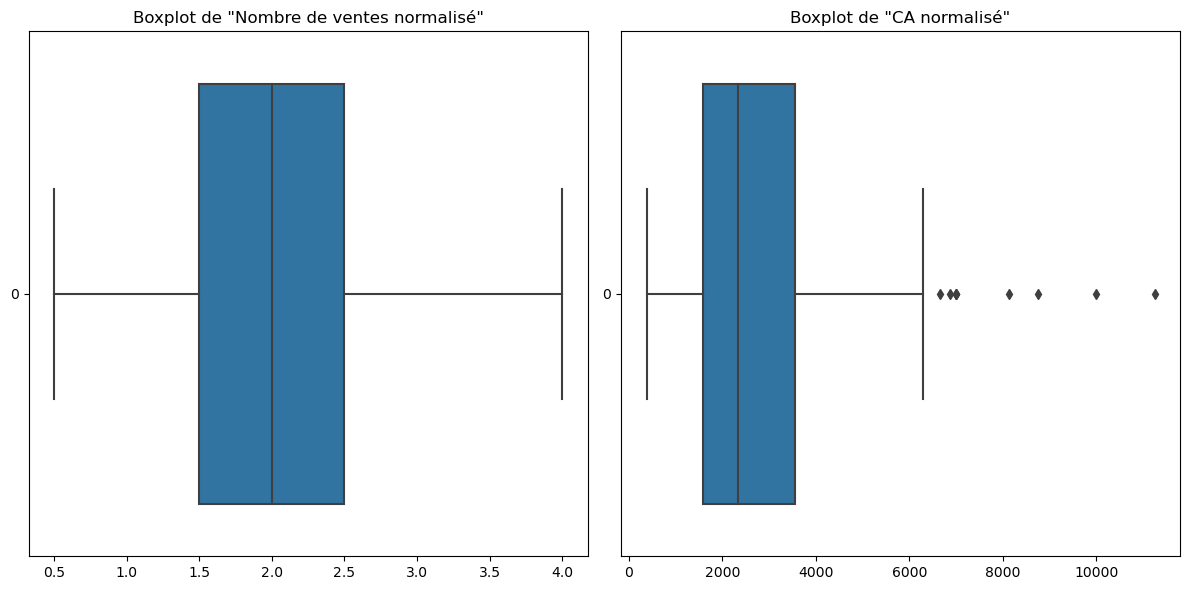

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 6))

# Tracer le premier boxplot pour 'Nombre de ventes normalisé'
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier sous-graphique
sns.boxplot(data=merged_df["Nombre de ventes normalisé"], orient='h')
plt.title('Boxplot de "Nombre de ventes normalisé"')

# Tracer le deuxième boxplot pour 'CA normalisé'
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième sous-graphique
sns.boxplot(data=merged_df["CA normalisé"], orient='h')
plt.title('Boxplot de "CA normalisé"')

# Afficher les graphiques
plt.tight_layout()  # Ajuster automatiquement la mise en page pour éviter le chevauchement
plt.show()

In [17]:
# selection des produits superieurs au 3em quartille
merged_df=merged_df[merged_df["Nombre de ventes normalisé"]>2.5]
merged_df

,Produit,Année,Nombre de ventes normalisé,CA normalisé
1,Barre de chocolat Milka,3,3.00,2250.0
3,Baume après-rasage hydratant Nivea,3,3.25,2275.0
15,Bouteille d'eau minérale Cristaline,3,2.75,1375.0
18,Bouteille de bière Guinness,4,3.00,3000.0
24,Bouteille de shampoing Head & Shoulders,2,3.25,4875.0
40,Coppa,3,3.75,6000.0
42,Crème anti-rides Nivea,4,3.25,8125.0
55,Crème raffermissante pour le corps Garnier,3,3.50,7000.0
56,Crème réparatrice Cicabiafine,3,3.25,4875.0
58,Crème réparatrice pour les pieds Scholl,3,3.00,4500.0


In [18]:
# Trier le dataframe par 'Nombre de ventes normalisé' puis par 'CA normalisé' en cas d'égalité
top_10_produits = merged_df.sort_values(by=['Nombre de ventes normalisé', 'CA normalisé'], ascending=False).head(10)

# Afficher le top 10 des produits
top_10_produits

,Produit,Année,Nombre de ventes normalisé,CA normalisé
280,Saucisson à la pistache,4,4.00,6300.0
305,Sérum hydratant Vichy,3,3.75,11250.0
40,Coppa,3,3.75,6000.0
202,Rillettes d'oie,2,3.75,5625.0
269,Saucisson aux noisettes,3,3.75,5250.0
270,Saucisson de Lyon,4,3.75,5250.0
55,Crème raffermissante pour le corps Garnier,3,3.50,7000.0
112,Jambon de Luxeuil,3,3.50,7000.0
124,Jambon des Ardennes,2,3.50,7000.0
111,Jambon de Bayonne,4,3.50,6650.0


In [19]:
# Obtenir une liste des produits uniques
produits_uniques = top_10_produits["Produit"].unique()

# Identifier les éléments de la liste des produits uniques dans le DataFrame
df = df[df['Produit'].isin(produits_uniques)]
df

,Produit,Année,Mois,Nombre de ventes,CA,Prix Unitaire
259,Coppa,2021,12,1,1600.0,1600.0
260,Coppa,2022,1,1,1600.0,1600.0
261,Coppa,2022,6,1,1600.0,1600.0
262,Coppa,2022,7,1,1600.0,1600.0
263,Coppa,2022,9,2,3200.0,1600.0
...,...,...,...,...,...,...
2097,Sérum hydratant Vichy,2023,1,1,3000.0,3000.0
2098,Sérum hydratant Vichy,2023,9,1,3000.0,3000.0
2099,Sérum hydratant Vichy,2023,11,2,6000.0,3000.0
2100,Sérum hydratant Vichy,2023,12,1,3000.0,3000.0


In [20]:
# Créer une colonne "Date"
df["Date"] = pd.to_datetime(df["Année"].astype(str) + "-" + df["Mois"].astype(str))

# Supprimer les colonnes Année et Mois car elles ne sont plus nécessaires
df.drop(columns=['Année', 'Mois'], inplace=True)

# Trier les données par date
df = df.sort_values('Date')

# afficher
df

,Produit,Nombre de ventes,CA,Prix Unitaire,Date
757,Jambon de Bayonne,1,1900.0,1900.0,2021-02-01
1932,Saucisson à la pistache,1,1800.0,1800.0,2021-02-01
765,Jambon de Luxeuil,1,2000.0,2000.0,2021-06-01
1858,Saucisson de Lyon,1,1400.0,1400.0,2021-06-01
369,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2021-06-01
...,...,...,...,...,...
1869,Saucisson de Lyon,1,1400.0,1400.0,2024-01-01
1941,Saucisson à la pistache,2,3200.0,1600.0,2024-01-01
1857,Saucisson aux noisettes,2,2800.0,1400.0,2024-01-01
764,Jambon de Bayonne,2,3800.0,1900.0,2024-01-01


In [21]:
# Trouver la date minimale et maximale
date_min = df['Date'].min()
date_max = df['Date'].max()

print("Date minimale:", date_min)
print("Date maximale:", date_max)

Date minimale: 2021-02-01 00:00:00
Date maximale: 2024-01-01 00:00:00


# Etude des series temporelles

In [22]:
# Diviser le DataFrame en sous-DataFrames en fonction des produits
sous_dataframes = {}
for produit, sous_df in df.groupby('Produit'):
    sous_dataframes[produit] = sous_df

**Saucisson à la pistache**

In [23]:
# Accéder au DataFrame spécifique pour le produit
Saucisson_à_la_pistache_df = sous_dataframes['Saucisson à la pistache']
Saucisson_à_la_pistache_df.reset_index(drop=True, inplace=True)
Saucisson_à_la_pistache_df

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Saucisson_à_la_pistache_df.shape[0]} lignes et {Saucisson_à_la_pistache_df.shape[1]} colonnes")
Saucisson_à_la_pistache_df


Le jeu de données a 10 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Saucisson à la pistache,1,1800.0,1800.000000,2021-02-01
1,Saucisson à la pistache,1,1400.0,1400.000000,2021-12-01
2,Saucisson à la pistache,1,1400.0,1400.000000,2022-02-01
3,Saucisson à la pistache,3,4600.0,1533.333333,2022-03-01
4,Saucisson à la pistache,2,3200.0,1600.000000,2022-04-01
5,Saucisson à la pistache,1,1800.0,1800.000000,2022-05-01
6,Saucisson à la pistache,1,1800.0,1800.000000,2022-06-01
7,Saucisson à la pistache,1,1800.0,1800.000000,2023-11-01
8,Saucisson à la pistache,3,4200.0,1400.000000,2023-12-01
9,Saucisson à la pistache,2,3200.0,1600.000000,2024-01-01


1600.0


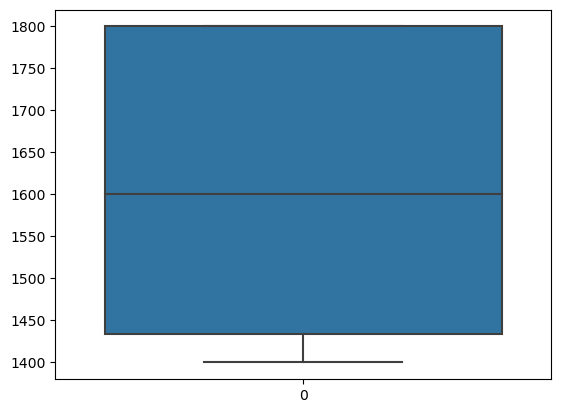

In [24]:
# voir la distribution des prix unitaire
sns.boxplot(Saucisson_à_la_pistache_df["Prix Unitaire"])
print(Saucisson_à_la_pistache_df["Prix Unitaire"].median())

In [25]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Saucisson_à_la_pistache_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Saucisson_à_la_pistache_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Saucisson à la pistache", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Saucisson à la pistache,1.0,1800.0,1800.0
1,2021-02-02,Saucisson à la pistache,0.0,0.0,1600.0
2,2021-02-03,Saucisson à la pistache,0.0,0.0,1600.0
3,2021-02-04,Saucisson à la pistache,0.0,0.0,1600.0
4,2021-02-05,Saucisson à la pistache,0.0,0.0,1600.0


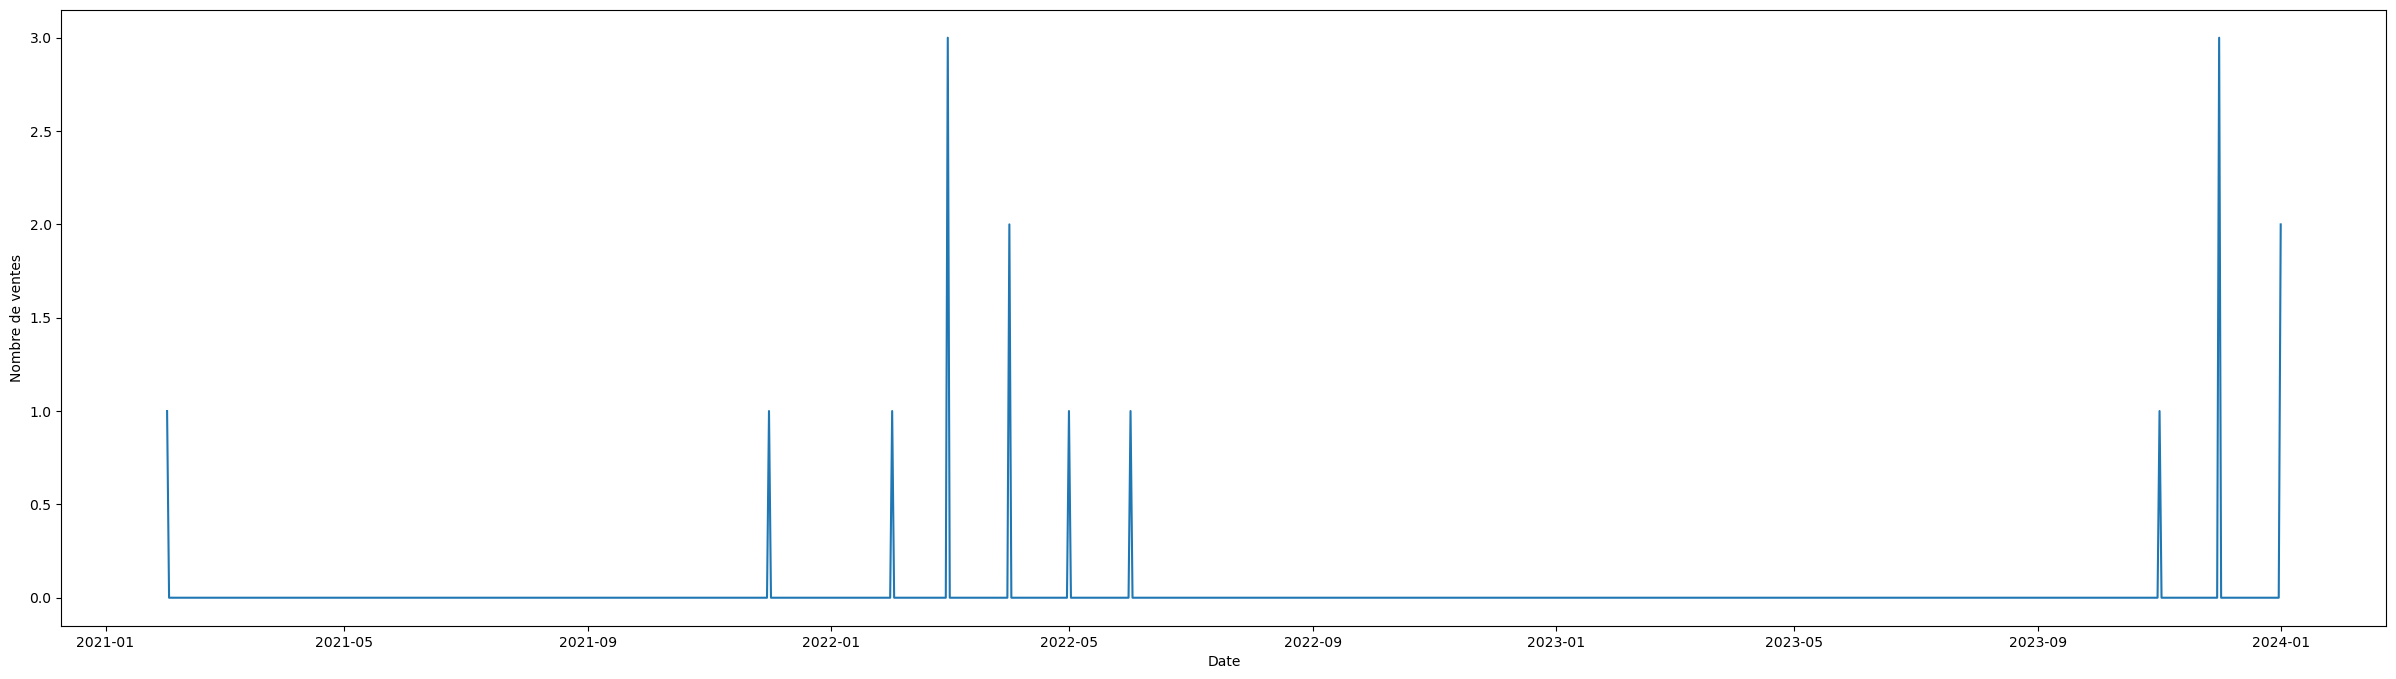

In [26]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:14 - cmdstanpy - INFO - Chain [1] start processing
19:08:14 - cmdstanpy - INFO - Chain [1] done processing


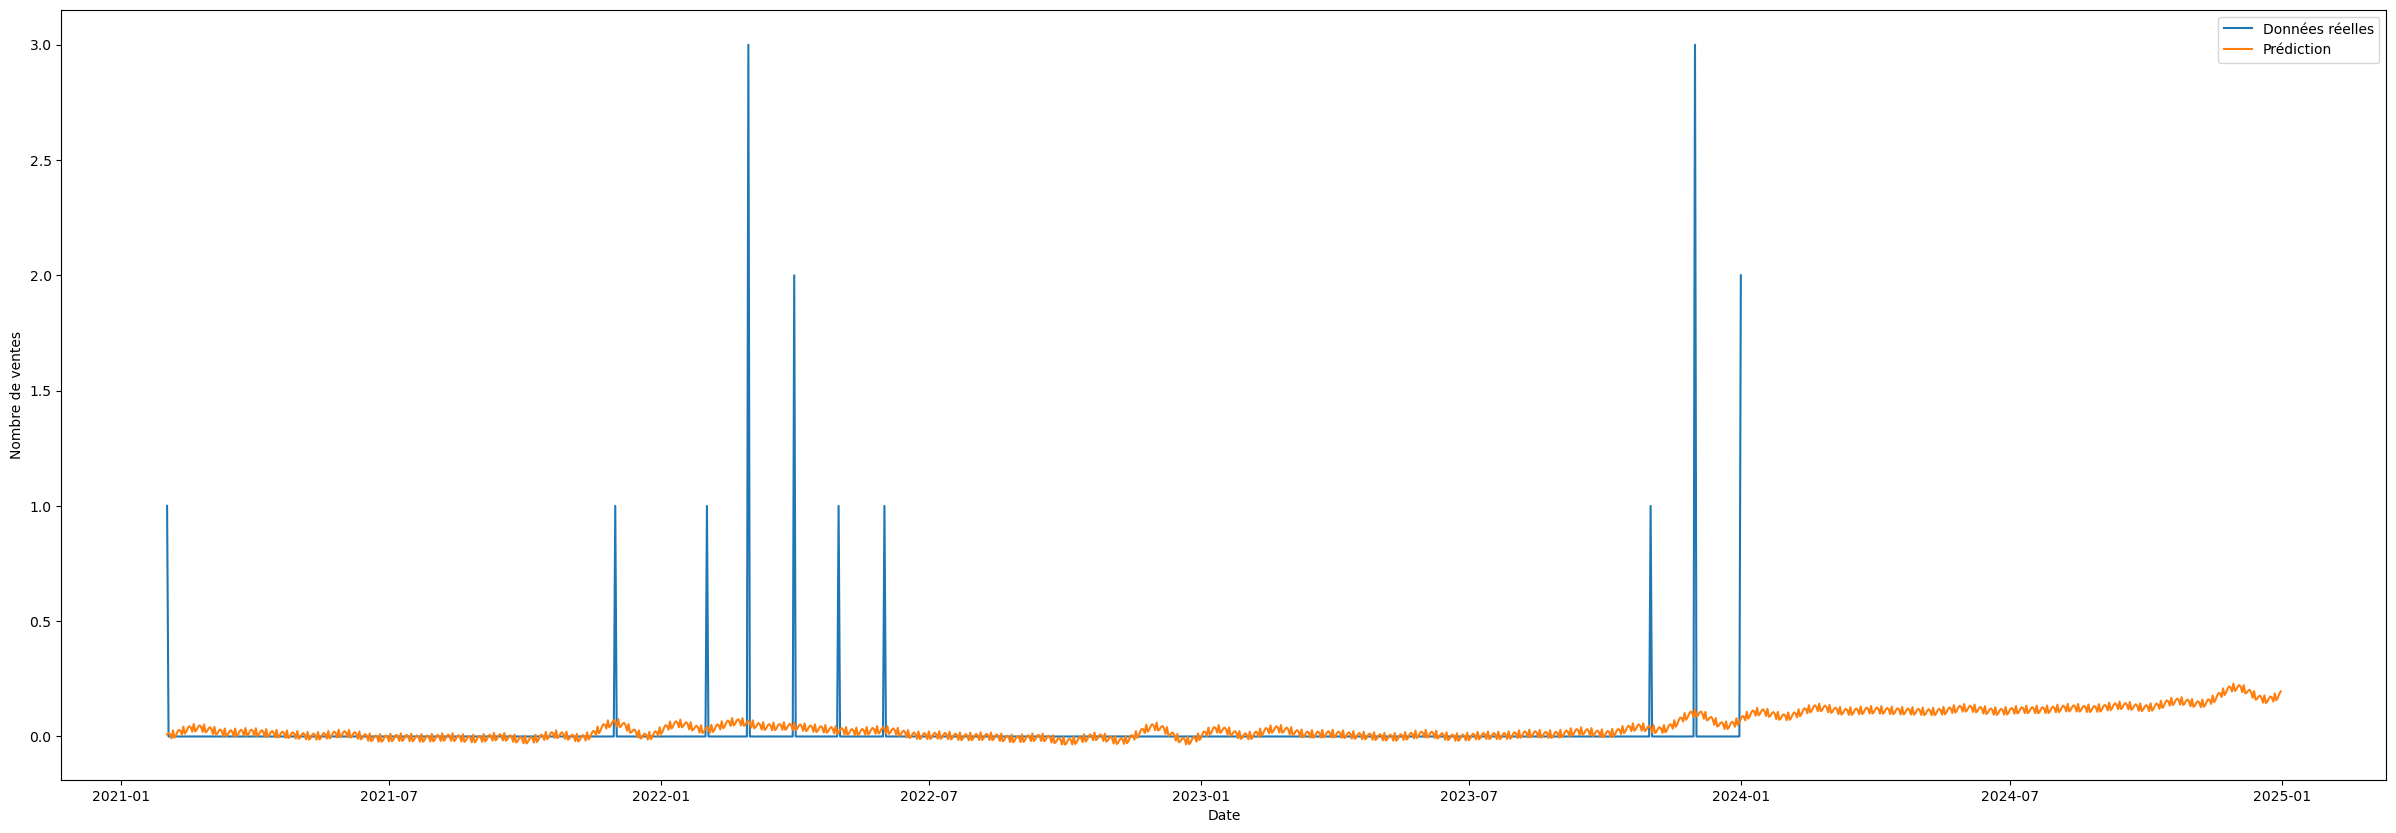

In [27]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.0362061494203242
RMSE: 0.17018595495438257


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.119077
1  2024-04-02  0.125981
2  2024-04-03  0.119144
3  2024-04-04  0.099087
4  2024-04-05  0.131671
5  2024-04-06  0.098376
6  2024-04-07  0.104573
7  2024-04-08  0.117301
8  2024-04-09  0.124027
9  2024-04-10  0.117084
10 2024-04-11  0.096989
11 2024-04-12  0.129596
12 2024-04-13  0.096377
13 2024-04-14  0.102694
14 2024-04-15  0.115573
15 2024-04-16  0.122471
16 2024-04-17  0.115706
17 2024-04-18  0.095786
18 2024-04-19  0.128552
19 2024-04-20  0.095468
20 2024-04-21  0.101888
21 2024-04-22  0.114831
22 2024-04-23  0.121750
23 2024-04-24  0.114965
24 2024-04-25  0.094982
25 2024-04-26  0.127648
26 2024-04-27  0.094432
27 2024-04-28  0.100696
28 2024-04-29  0.113471
29 2024-04-30  0.120220


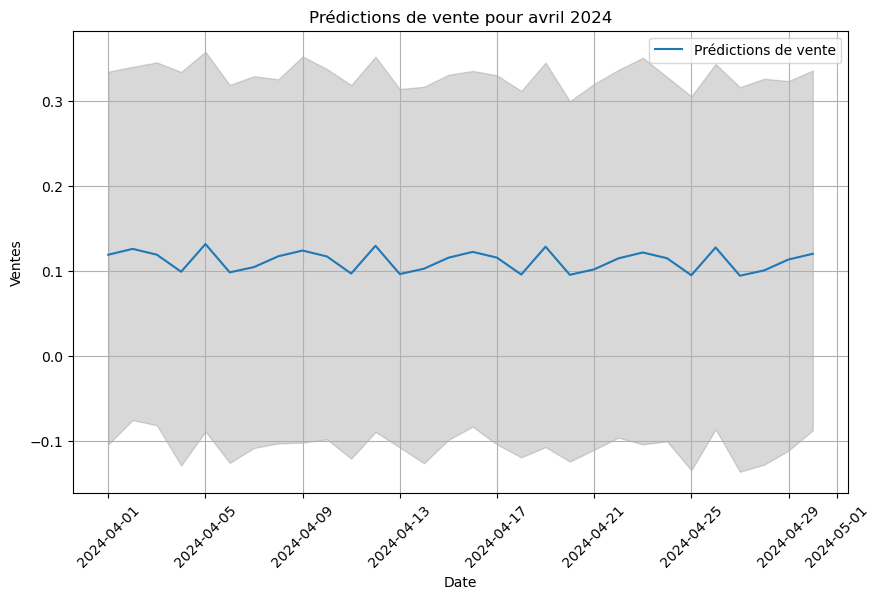

In [29]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [30]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)


Chiffre total des ventes pour avril 2024 : 3


In [31]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Saucisson_à_la_pistache_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 4800.0


In [32]:
# import pickle

# # Enregistrer le modèle
# with open('model/Saucisson_à_la_pistache.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Saucisson_à_la_pistache.pkl'")


In [33]:
# import pandas as pd

# # Produit constant
# produit_constant = df_suréchantillonné["Produit"].unique()[0]

# # Calculer le chiffre total des ventes pour avril 2024
# chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# # Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
# prix_unitaire_median = Saucisson_à_la_pistache_df["Prix Unitaire"].median()

# # Calculer le chiffre d'affaires pour avril 2024
# chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# # Créer un DataFrame pour enregistrer les chiffres pour ce produit constant
# data = {'Produit': [produit_constant],
#         'Chiffre_total_avril_2024': [chiffre_total_avril_2024],
#         'Chiffre_affaires_avril_2024': [chiffre_affaires_avril_2024]}

# df_chiffres_avril_2024 = pd.DataFrame(data)

# # Afficher le DataFrame final
# df_chiffres_avril_2024


**Sérum hydratant Vichy**

In [34]:
# Accéder au DataFrame spécifique pour un produit
Sérum_hydratant_Vichy_df = sous_dataframes['Sérum hydratant Vichy']
Sérum_hydratant_Vichy_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Sérum_hydratant_Vichy_df.shape[0]} lignes et {Sérum_hydratant_Vichy_df.shape[1]} colonnes")
Sérum_hydratant_Vichy_df

Le jeu de données a 12 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Sérum hydratant Vichy,1,3000.0,3000.0,2022-01-01
1,Sérum hydratant Vichy,2,6000.0,3000.0,2022-05-01
2,Sérum hydratant Vichy,2,6000.0,3000.0,2022-07-01
3,Sérum hydratant Vichy,1,3000.0,3000.0,2022-08-01
4,Sérum hydratant Vichy,1,3000.0,3000.0,2022-09-01
5,Sérum hydratant Vichy,1,3000.0,3000.0,2022-10-01
6,Sérum hydratant Vichy,1,3000.0,3000.0,2022-11-01
7,Sérum hydratant Vichy,1,3000.0,3000.0,2023-01-01
8,Sérum hydratant Vichy,1,3000.0,3000.0,2023-09-01
9,Sérum hydratant Vichy,2,6000.0,3000.0,2023-11-01


In [35]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Sérum_hydratant_Vichy_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Sérum_hydratant_Vichy_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Sérum hydratant Vichy", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Sérum hydratant Vichy,0.0,0.0,3000.0
1,2021-02-02,Sérum hydratant Vichy,0.0,0.0,3000.0
2,2021-02-03,Sérum hydratant Vichy,0.0,0.0,3000.0
3,2021-02-04,Sérum hydratant Vichy,0.0,0.0,3000.0
4,2021-02-05,Sérum hydratant Vichy,0.0,0.0,3000.0


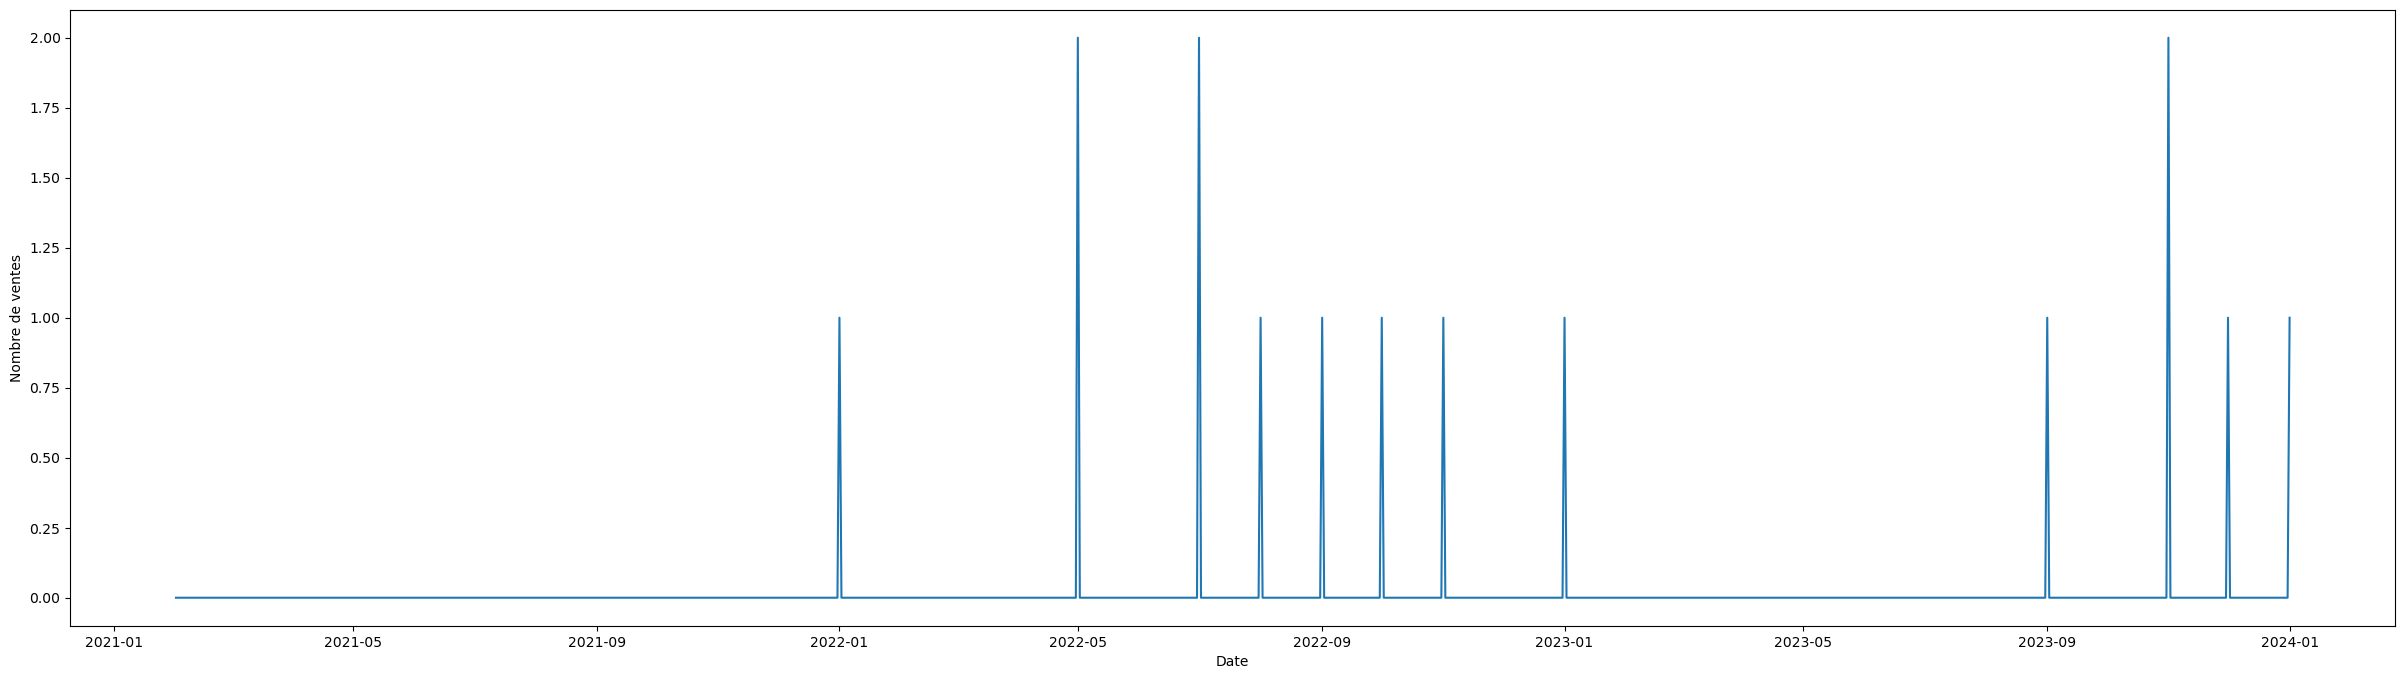

In [36]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:20 - cmdstanpy - INFO - Chain [1] start processing
19:08:20 - cmdstanpy - INFO - Chain [1] done processing


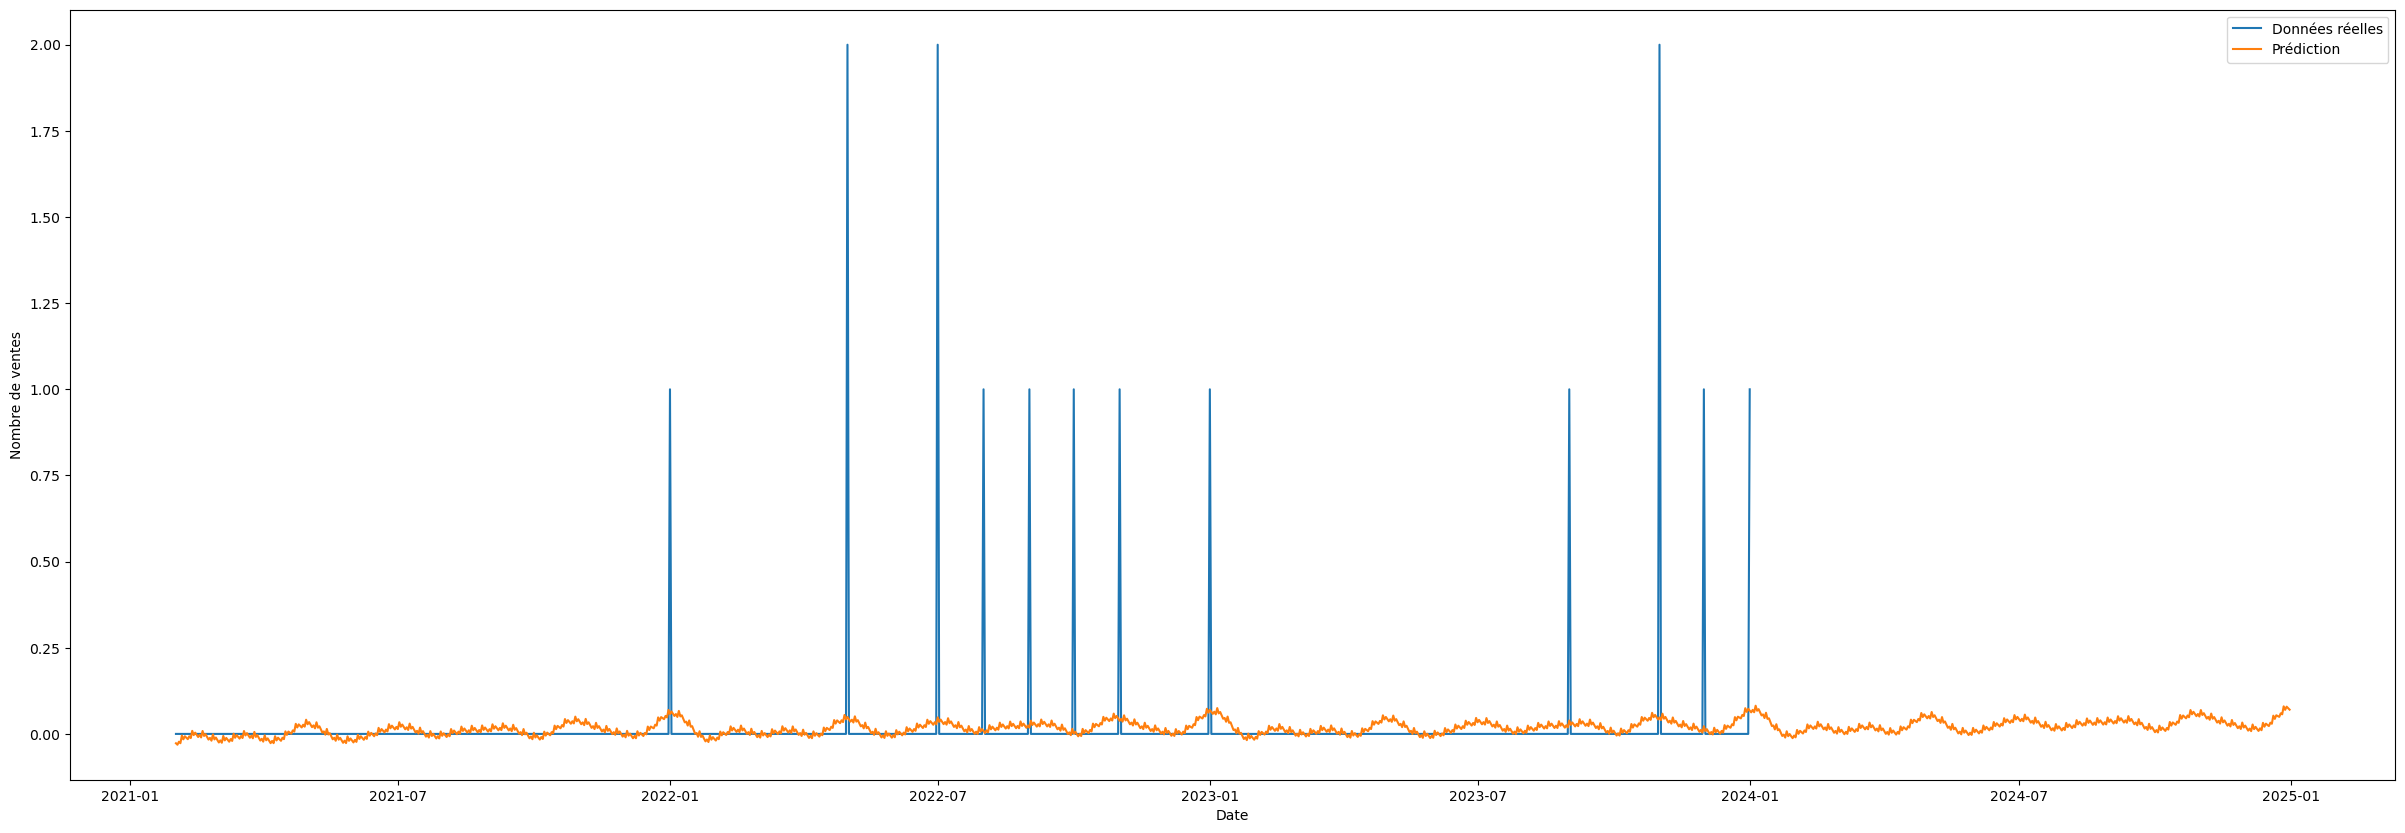

In [37]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.03172681602752316
RMSE: 0.13831790465812638


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.007744
1  2024-04-02  0.000201
2  2024-04-03  0.005549
3  2024-04-04 -0.002043
4  2024-04-05  0.016950
5  2024-04-06  0.003344
6  2024-04-07  0.009810
7  2024-04-08  0.003646
8  2024-04-09 -0.001888
9  2024-04-10  0.005663
10 2024-04-11  0.000421
11 2024-04-12  0.021852
12 2024-04-13  0.010715
13 2024-04-14  0.019620
14 2024-04-15  0.015808
15 2024-04-16  0.012476
16 2024-04-17  0.022029
17 2024-04-18  0.018535
18 2024-04-19  0.041416
19 2024-04-20  0.031394
20 2024-04-21  0.041049
21 2024-04-22  0.037599
22 2024-04-23  0.034231
23 2024-04-24  0.043344
24 2024-04-25  0.039014
25 2024-04-26  0.060678
26 2024-04-27  0.049081
27 2024-04-28  0.056836
28 2024-04-29  0.051199
29 2024-04-30  0.045402


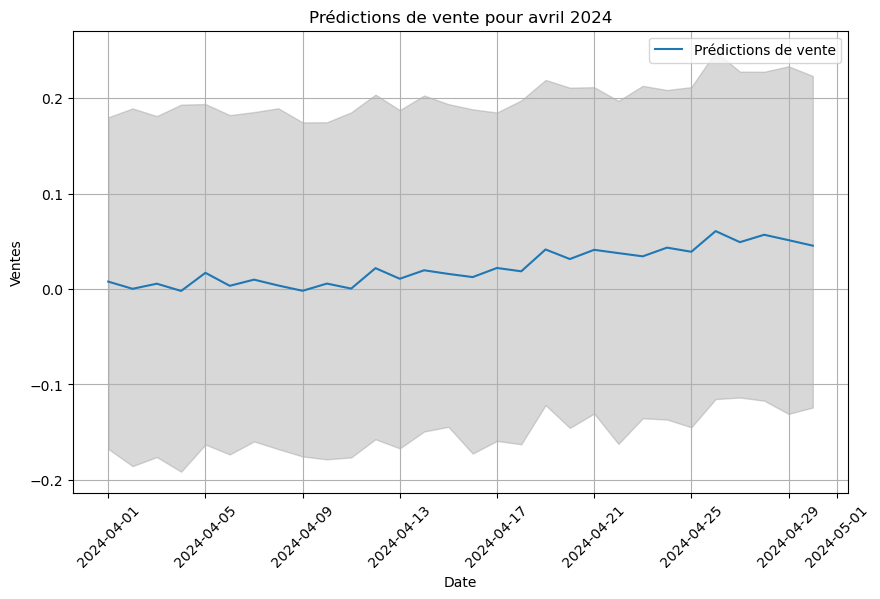

In [39]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [40]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)


Chiffre total des ventes pour avril 2024 : 1


In [41]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Sérum_hydratant_Vichy_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 3000.0


In [42]:
# import pickle

# # Enregistrer le modèle
# with open('model/Sérum_hydratant_Vichy.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Sérum_hydratant_Vichy.pkl'")


**Coppa**

In [43]:
# Accéder au DataFrame spécifique pour le produit
coppa_df = sous_dataframes['Coppa']
coppa_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {coppa_df.shape[0]} lignes et {coppa_df.shape[1]} colonnes")
coppa_df

Le jeu de données a 13 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Coppa,1,1600.0,1600.0,2021-12-01
1,Coppa,1,1600.0,1600.0,2022-01-01
2,Coppa,1,1600.0,1600.0,2022-06-01
3,Coppa,1,1600.0,1600.0,2022-07-01
4,Coppa,2,3200.0,1600.0,2022-09-01
5,Coppa,1,1600.0,1600.0,2022-11-01
6,Coppa,1,1600.0,1600.0,2022-12-01
7,Coppa,1,1600.0,1600.0,2023-01-01
8,Coppa,1,1600.0,1600.0,2023-05-01
9,Coppa,1,1600.0,1600.0,2023-08-01


In [44]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(coppa_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, coppa_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "coppa", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,coppa,0.0,0.0,1600.0
1,2021-02-02,coppa,0.0,0.0,1600.0
2,2021-02-03,coppa,0.0,0.0,1600.0
3,2021-02-04,coppa,0.0,0.0,1600.0
4,2021-02-05,coppa,0.0,0.0,1600.0


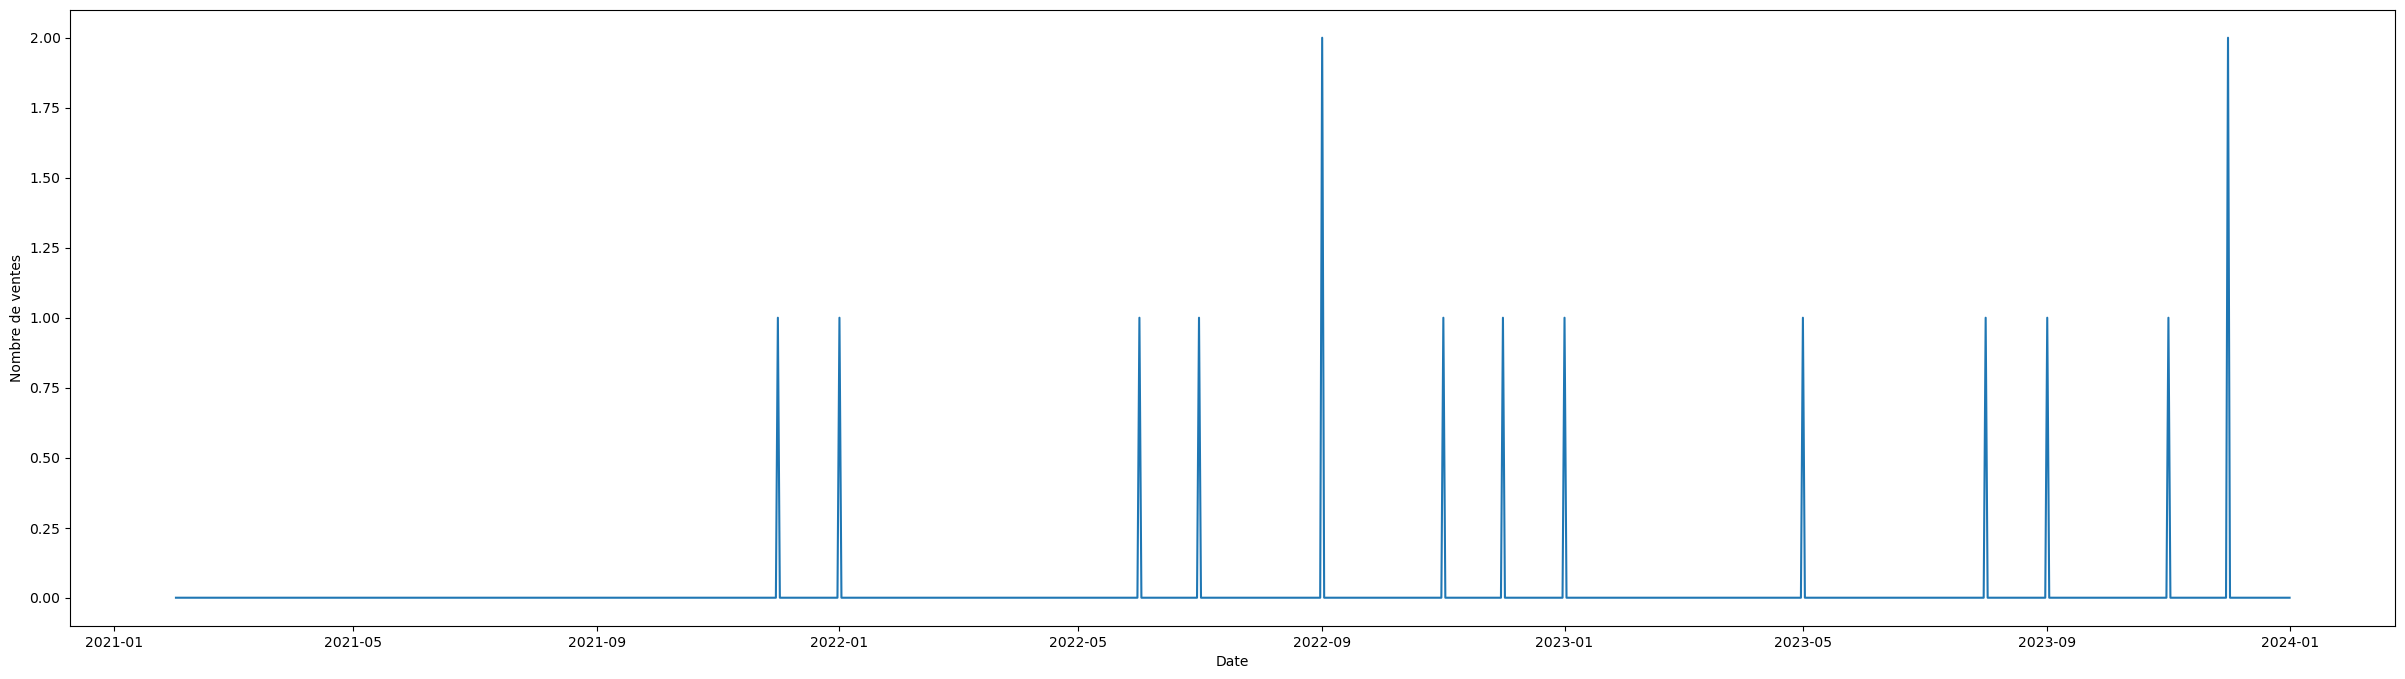

In [45]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:24 - cmdstanpy - INFO - Chain [1] start processing
19:08:24 - cmdstanpy - INFO - Chain [1] done processing


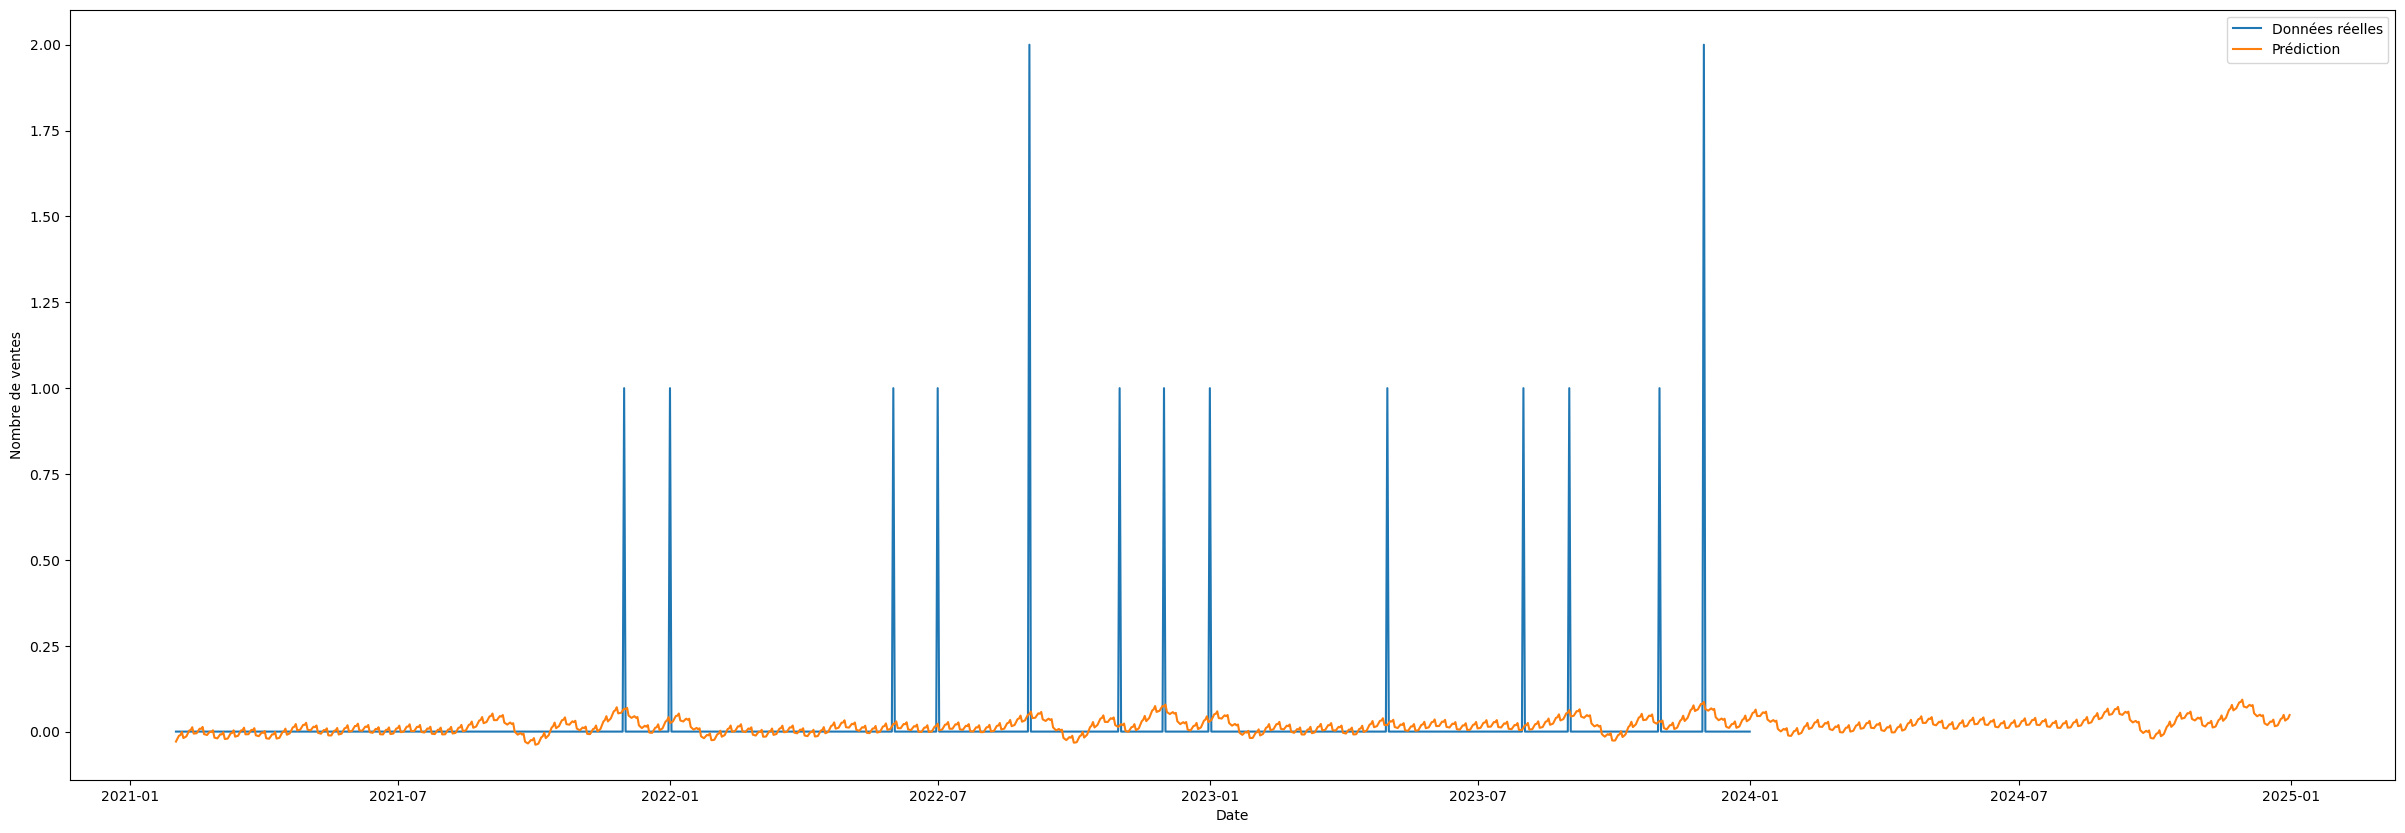

In [46]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.03203611110801265
RMSE: 0.13123918914570973


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.001735
1  2024-04-02  0.007368
2  2024-04-03  0.012903
3  2024-04-04  0.012035
4  2024-04-05  0.017961
5  2024-04-06 -0.002202
6  2024-04-07 -0.002356
7  2024-04-08 -0.002043
8  2024-04-09  0.005186
9  2024-04-10  0.012456
10 2024-04-11  0.013411
11 2024-04-12  0.021200
12 2024-04-13  0.002887
13 2024-04-14  0.004515
14 2024-04-15  0.006495
15 2024-04-16  0.015227
16 2024-04-17  0.023793
17 2024-04-18  0.025800
18 2024-04-19  0.034367
19 2024-04-20  0.016536
20 2024-04-21  0.018336
21 2024-04-22  0.020171
22 2024-04-23  0.028446
23 2024-04-24  0.036255
24 2024-04-25  0.037226
25 2024-04-26  0.044504
26 2024-04-27  0.025167
27 2024-04-28  0.025286
28 2024-04-29  0.025310
29 2024-04-30  0.031692


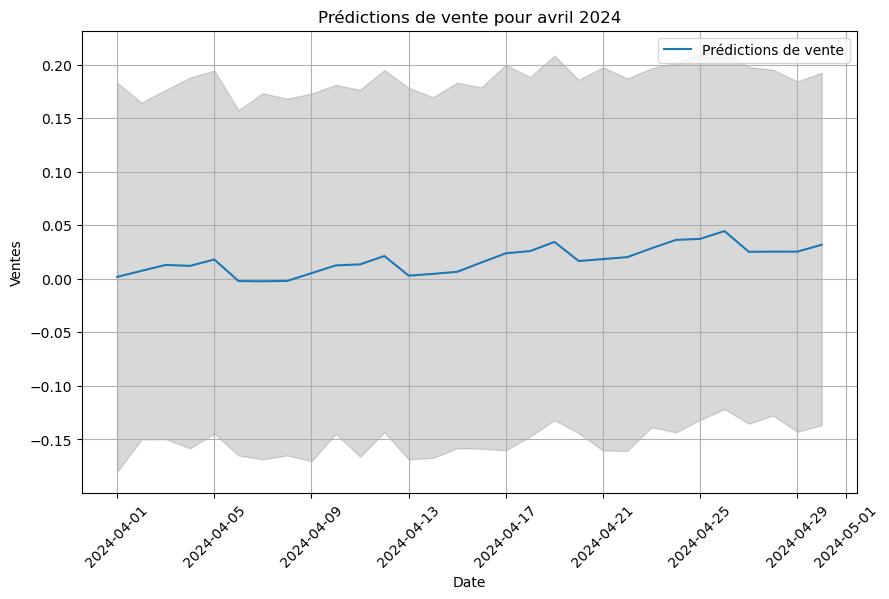

In [48]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [49]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 1


In [50]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = coppa_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 1600.0


In [51]:
# import pickle

# # Enregistrer le modèle
# with open('model/coppa.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'coppa.pkl'")


**Rillettes d'oie**

In [52]:
# Accéder au DataFrame spécifique pour le produit 'Coppa'
Rillettes_doie_df = sous_dataframes['Rillettes d\'oie']
Rillettes_doie_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Rillettes_doie_df.shape[0]} lignes et {Rillettes_doie_df.shape[1]} colonnes")
Rillettes_doie_df

Le jeu de données a 12 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Rillettes d'oie,1,1500.0,1500.0,2022-02-01
1,Rillettes d'oie,2,3000.0,1500.0,2022-03-01
2,Rillettes d'oie,1,1500.0,1500.0,2022-06-01
3,Rillettes d'oie,2,3000.0,1500.0,2022-09-01
4,Rillettes d'oie,2,3000.0,1500.0,2022-11-01
5,Rillettes d'oie,1,1500.0,1500.0,2022-12-01
6,Rillettes d'oie,1,1500.0,1500.0,2023-01-01
7,Rillettes d'oie,1,1500.0,1500.0,2023-03-01
8,Rillettes d'oie,1,1500.0,1500.0,2023-06-01
9,Rillettes d'oie,1,1500.0,1500.0,2023-09-01


In [53]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Rillettes_doie_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Rillettes_doie_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Rillettes d'oie", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Rillettes d'oie,0.0,0.0,1500.0
1,2021-02-02,Rillettes d'oie,0.0,0.0,1500.0
2,2021-02-03,Rillettes d'oie,0.0,0.0,1500.0
3,2021-02-04,Rillettes d'oie,0.0,0.0,1500.0
4,2021-02-05,Rillettes d'oie,0.0,0.0,1500.0


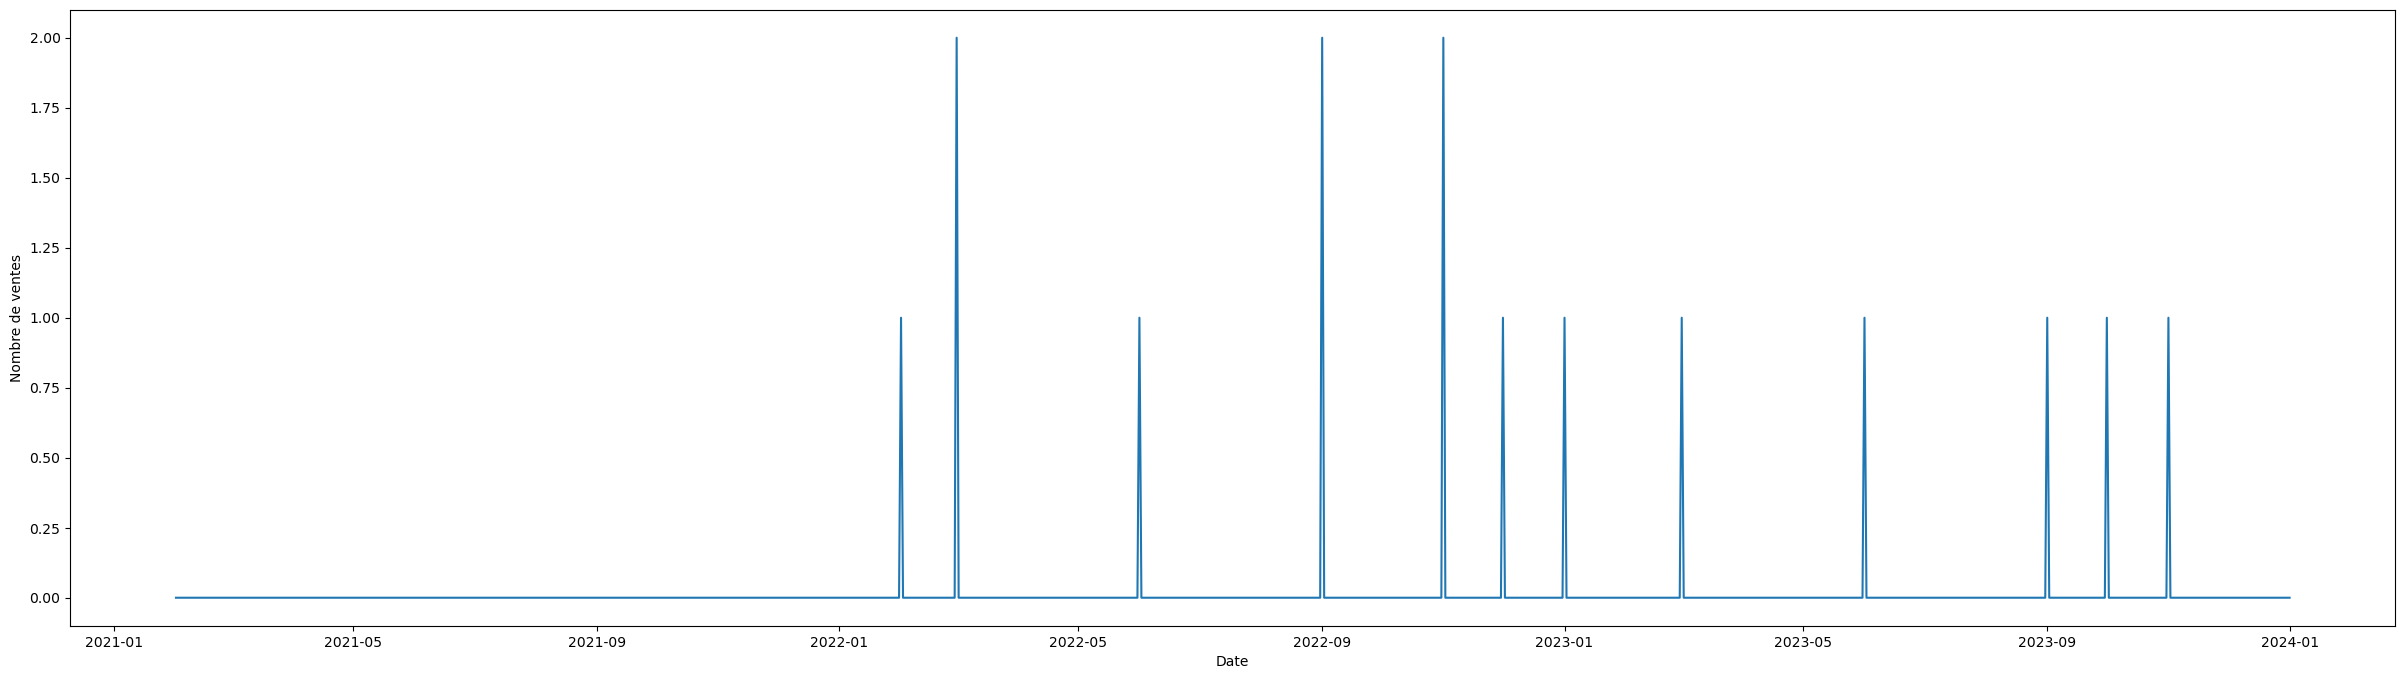

In [54]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:28 - cmdstanpy - INFO - Chain [1] start processing
19:08:28 - cmdstanpy - INFO - Chain [1] done processing


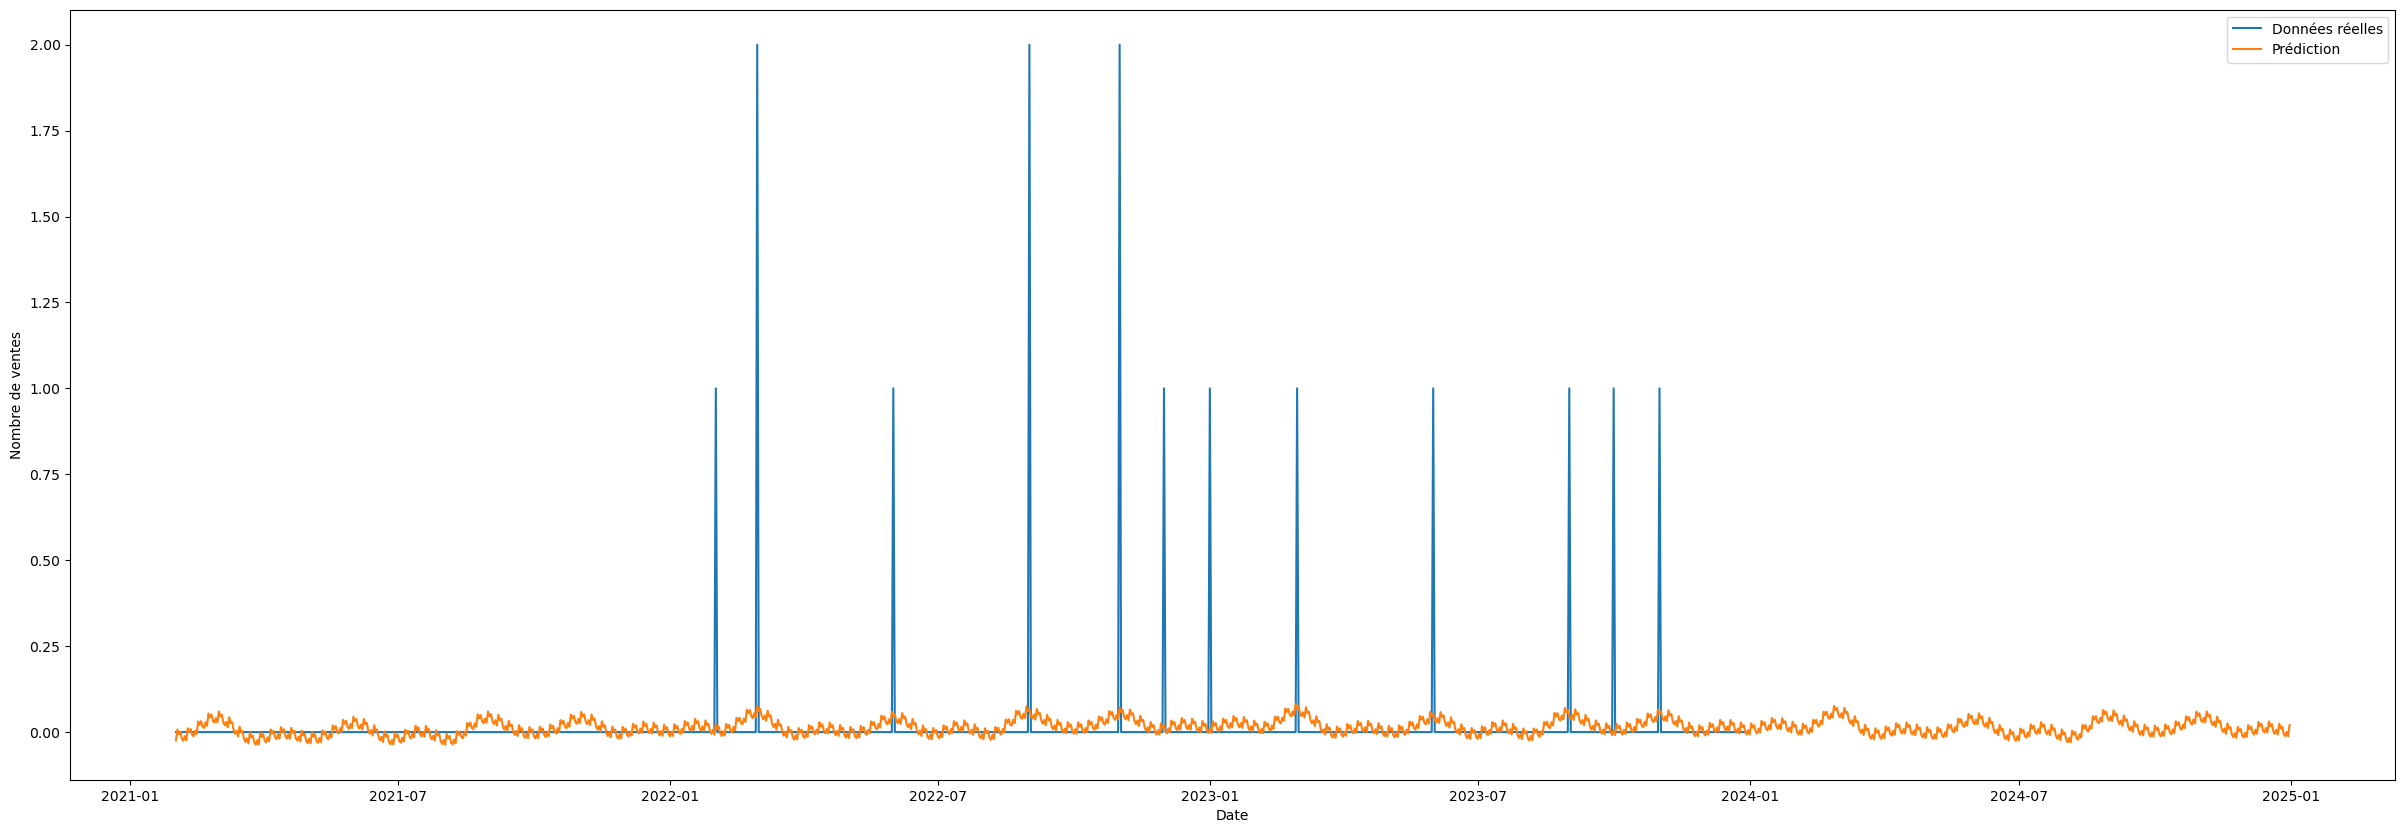

In [55]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.03383891494147392
RMSE: 0.13783024605178504


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01 -0.017481
1  2024-04-02  0.016705
2  2024-04-03  0.004961
3  2024-04-04  0.012993
4  2024-04-05 -0.005299
5  2024-04-06 -0.010476
6  2024-04-07  0.004005
7  2024-04-08 -0.007785
8  2024-04-09  0.026141
9  2024-04-10  0.013895
10 2024-04-11  0.021205
11 2024-04-12  0.002001
12 2024-04-13 -0.004249
13 2024-04-14  0.009030
14 2024-04-15 -0.004057
15 2024-04-16  0.028512
16 2024-04-17  0.014882
17 2024-04-18  0.020814
18 2024-04-19  0.000269
19 2024-04-20 -0.007254
20 2024-04-21  0.004847
21 2024-04-22 -0.009301
22 2024-04-23  0.022347
23 2024-04-24  0.007953
24 2024-04-25  0.013291
25 2024-04-26 -0.007666
26 2024-04-27 -0.015414
27 2024-04-28 -0.003346
28 2024-04-29 -0.017337
29 2024-04-30  0.014654


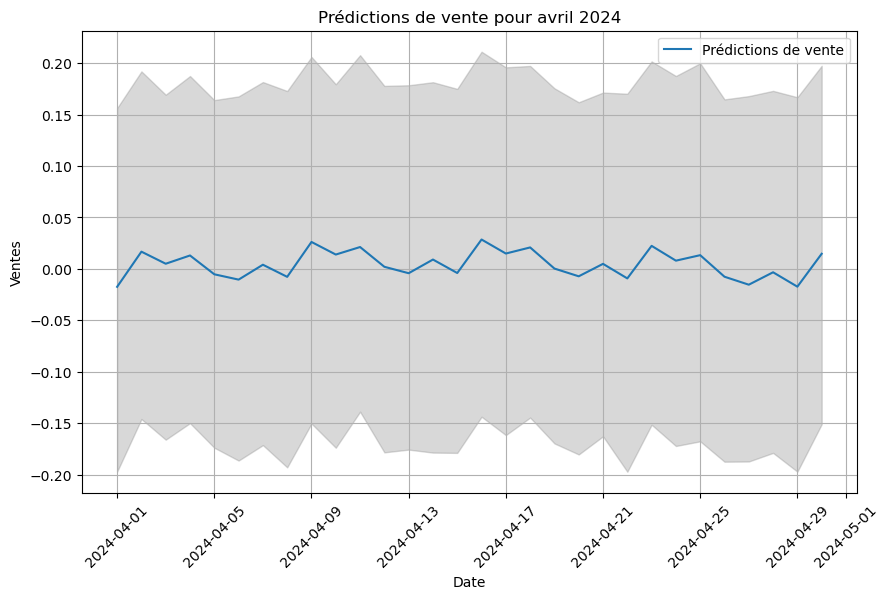

In [57]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [58]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 0


In [59]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Rillettes_doie_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 0.0


In [60]:
# import pickle

# # Enregistrer le modèle
# with open('model/Rillettes_doie.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Rillettes_doie.pkl'")


**Saucisson aux noisettes**

In [61]:
# Accéder au DataFrame spécifique pour le produit
Saucisson_aux_noisettes_df = sous_dataframes['Saucisson aux noisettes']
Saucisson_aux_noisettes_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Saucisson_aux_noisettes_df.shape[0]} lignes et {Saucisson_aux_noisettes_df.shape[1]} colonnes")
Saucisson_aux_noisettes_df

Le jeu de données a 13 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Saucisson aux noisettes,1,1400.0,1400.0,2022-01-01
1,Saucisson aux noisettes,1,1400.0,1400.0,2022-02-01
2,Saucisson aux noisettes,1,1400.0,1400.0,2022-08-01
3,Saucisson aux noisettes,1,1400.0,1400.0,2022-09-01
4,Saucisson aux noisettes,1,1400.0,1400.0,2022-10-01
5,Saucisson aux noisettes,2,2800.0,1400.0,2022-11-01
6,Saucisson aux noisettes,1,1400.0,1400.0,2022-12-01
7,Saucisson aux noisettes,1,1400.0,1400.0,2023-02-01
8,Saucisson aux noisettes,1,1400.0,1400.0,2023-05-01
9,Saucisson aux noisettes,1,1400.0,1400.0,2023-10-01


In [62]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Saucisson_aux_noisettes_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Saucisson_aux_noisettes_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Saucisson aux noisettes", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Saucisson aux noisettes,0.0,0.0,1400.0
1,2021-02-02,Saucisson aux noisettes,0.0,0.0,1400.0
2,2021-02-03,Saucisson aux noisettes,0.0,0.0,1400.0
3,2021-02-04,Saucisson aux noisettes,0.0,0.0,1400.0
4,2021-02-05,Saucisson aux noisettes,0.0,0.0,1400.0


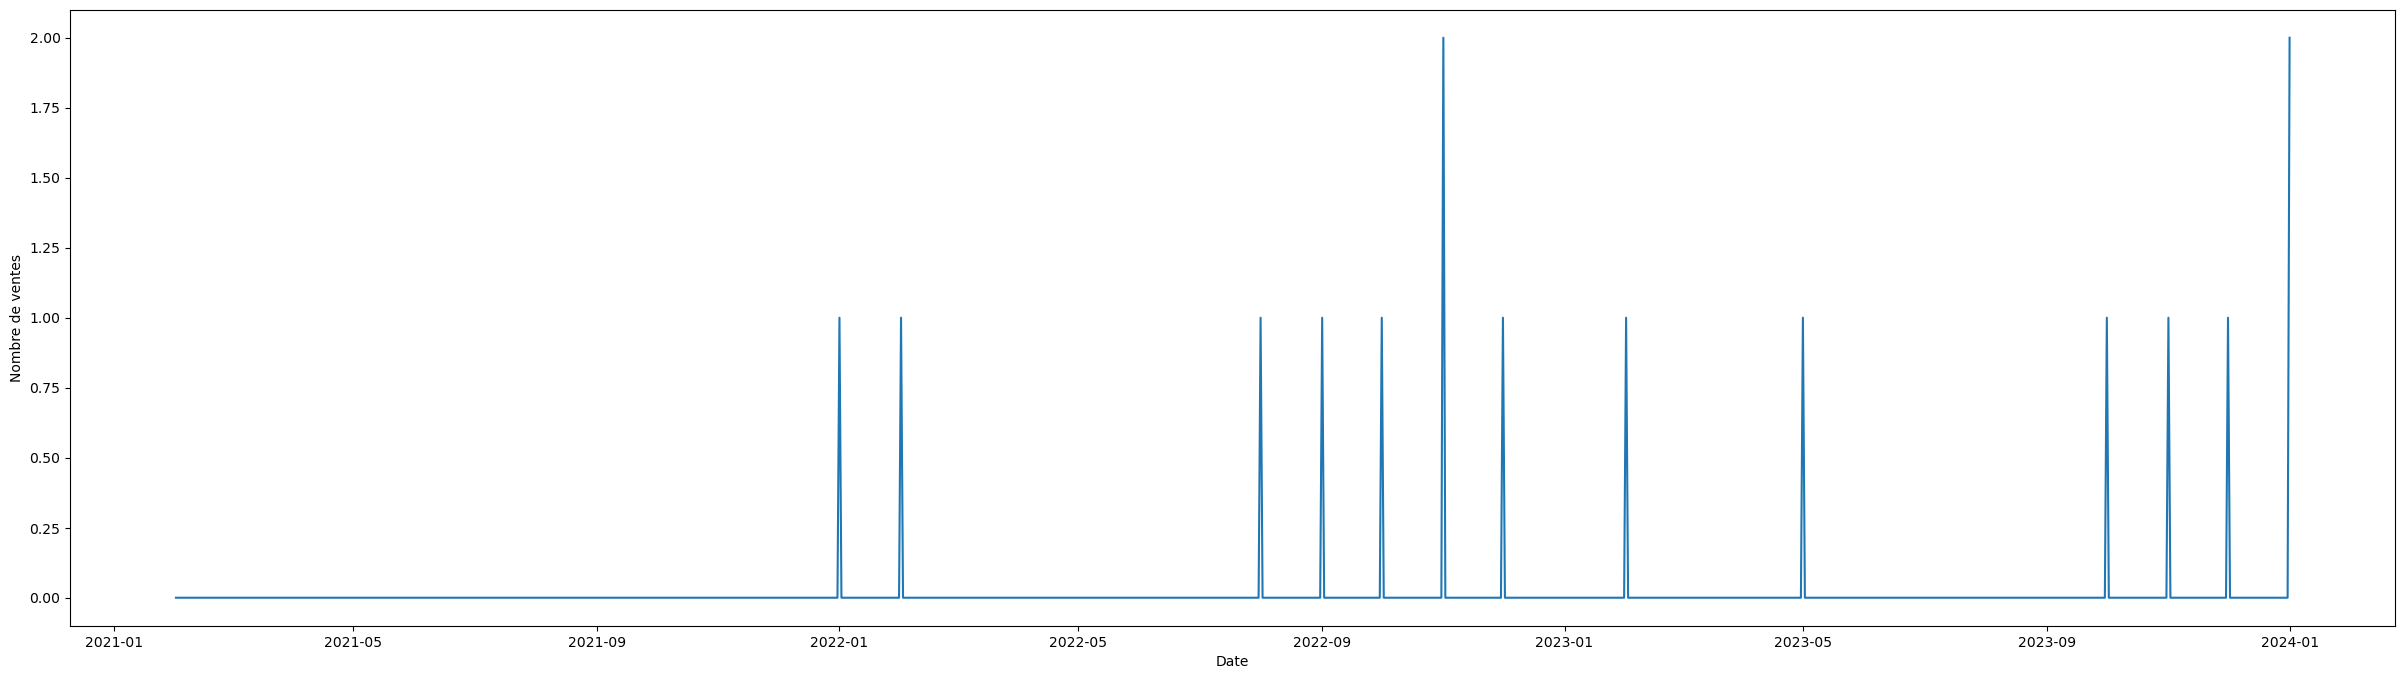

In [63]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:32 - cmdstanpy - INFO - Chain [1] start processing
19:08:33 - cmdstanpy - INFO - Chain [1] done processing


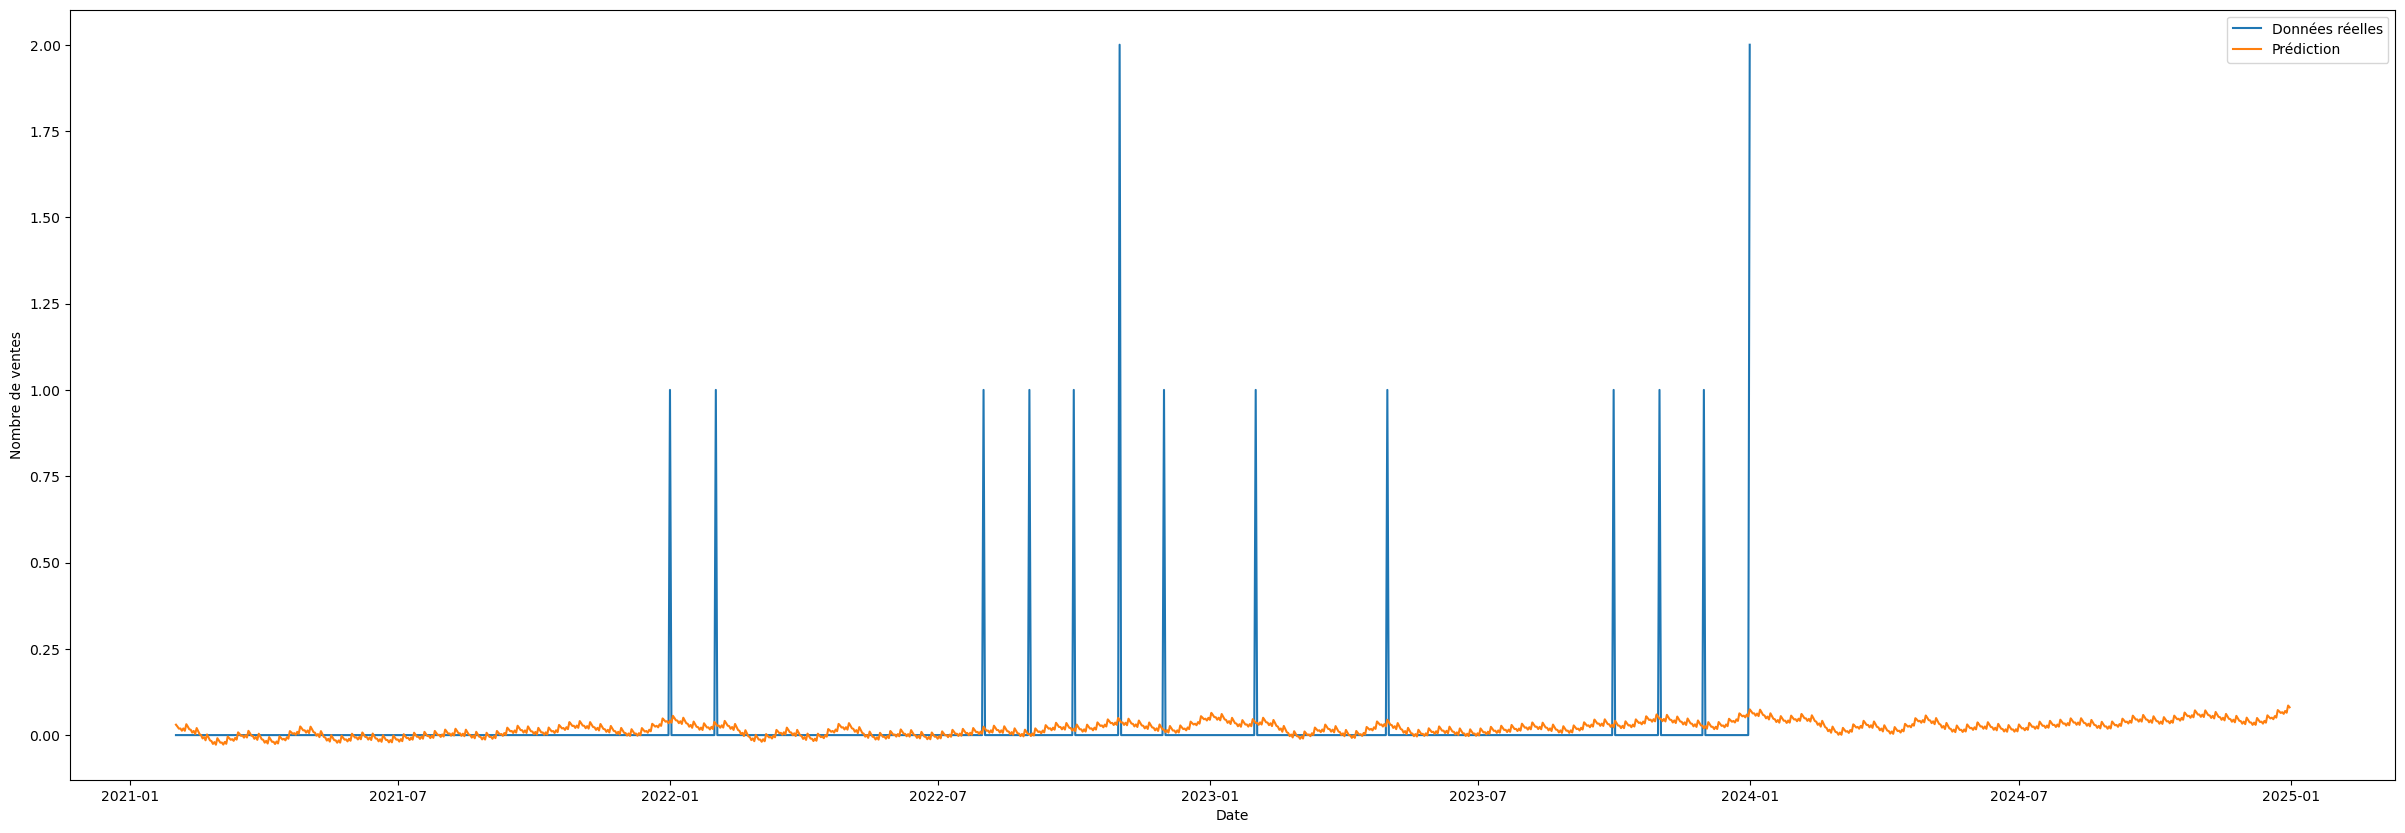

In [64]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.031343981001888295
RMSE: 0.13164923182729416


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.028458
1  2024-04-02  0.020872
2  2024-04-03  0.012969
3  2024-04-04  0.011863
4  2024-04-05  0.004431
5  2024-04-06  0.010442
6  2024-04-07  0.003603
7  2024-04-08  0.023207
8  2024-04-09  0.017514
9  2024-04-10  0.011658
10 2024-04-11  0.012701
11 2024-04-12  0.007466
12 2024-04-13  0.015666
13 2024-04-14  0.010952
14 2024-04-15  0.032561
15 2024-04-16  0.028704
16 2024-04-17  0.024466
17 2024-04-18  0.026867
18 2024-04-19  0.022697
19 2024-04-20  0.031640
20 2024-04-21  0.027328
21 2024-04-22  0.048987
22 2024-04-23  0.044825
23 2024-04-24  0.039936
24 2024-04-25  0.041355
25 2024-04-26  0.035894
26 2024-04-27  0.043269
27 2024-04-28  0.037148
28 2024-04-29  0.056803
29 2024-04-30  0.050488


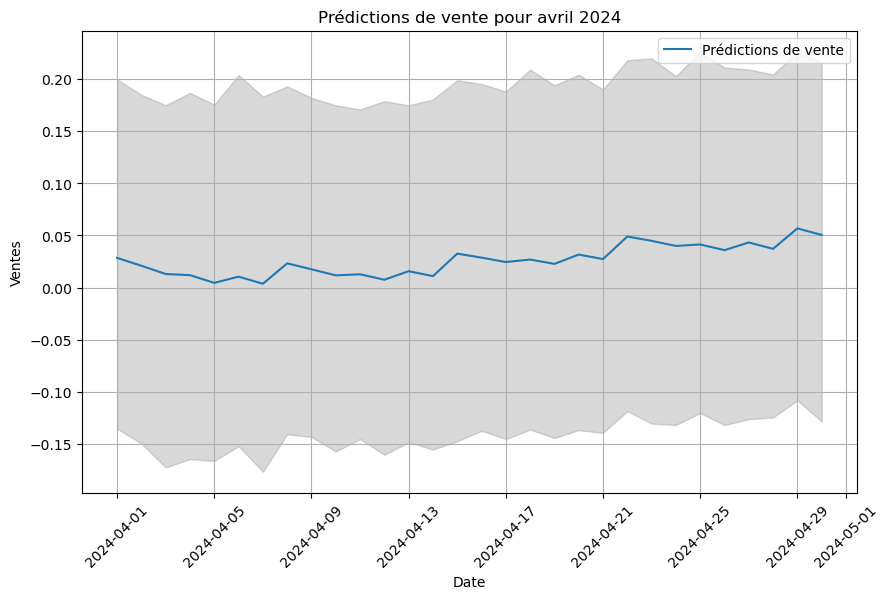

In [66]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [67]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 1


In [68]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Saucisson_aux_noisettes_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 1400.0


In [69]:
# import pickle

# # Enregistrer le modèle
# with open('model/Saucisson_aux_noisettes.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Saucisson_aux_noisettes.pkl'")


**Saucisson de Lyon**

In [70]:
# Accéder au DataFrame spécifique pour le produit
Saucisson_de_Lyon_df = sous_dataframes['Saucisson de Lyon']
Saucisson_de_Lyon_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Saucisson_de_Lyon_df.shape[0]} lignes et {Saucisson_de_Lyon_df.shape[1]} colonnes")
Saucisson_de_Lyon_df

Le jeu de données a 12 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Saucisson de Lyon,1,1400.0,1400.0,2021-06-01
1,Saucisson de Lyon,2,2800.0,1400.0,2022-01-01
2,Saucisson de Lyon,1,1400.0,1400.0,2022-03-01
3,Saucisson de Lyon,1,1400.0,1400.0,2022-05-01
4,Saucisson de Lyon,3,4200.0,1400.0,2022-06-01
5,Saucisson de Lyon,1,1400.0,1400.0,2022-09-01
6,Saucisson de Lyon,1,1400.0,1400.0,2022-12-01
7,Saucisson de Lyon,1,1400.0,1400.0,2023-02-01
8,Saucisson de Lyon,1,1400.0,1400.0,2023-05-01
9,Saucisson de Lyon,1,1400.0,1400.0,2023-11-01


In [71]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Saucisson_de_Lyon_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Saucisson_de_Lyon_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Saucisson de Lyon", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Saucisson de Lyon,0.0,0.0,1400.0
1,2021-02-02,Saucisson de Lyon,0.0,0.0,1400.0
2,2021-02-03,Saucisson de Lyon,0.0,0.0,1400.0
3,2021-02-04,Saucisson de Lyon,0.0,0.0,1400.0
4,2021-02-05,Saucisson de Lyon,0.0,0.0,1400.0


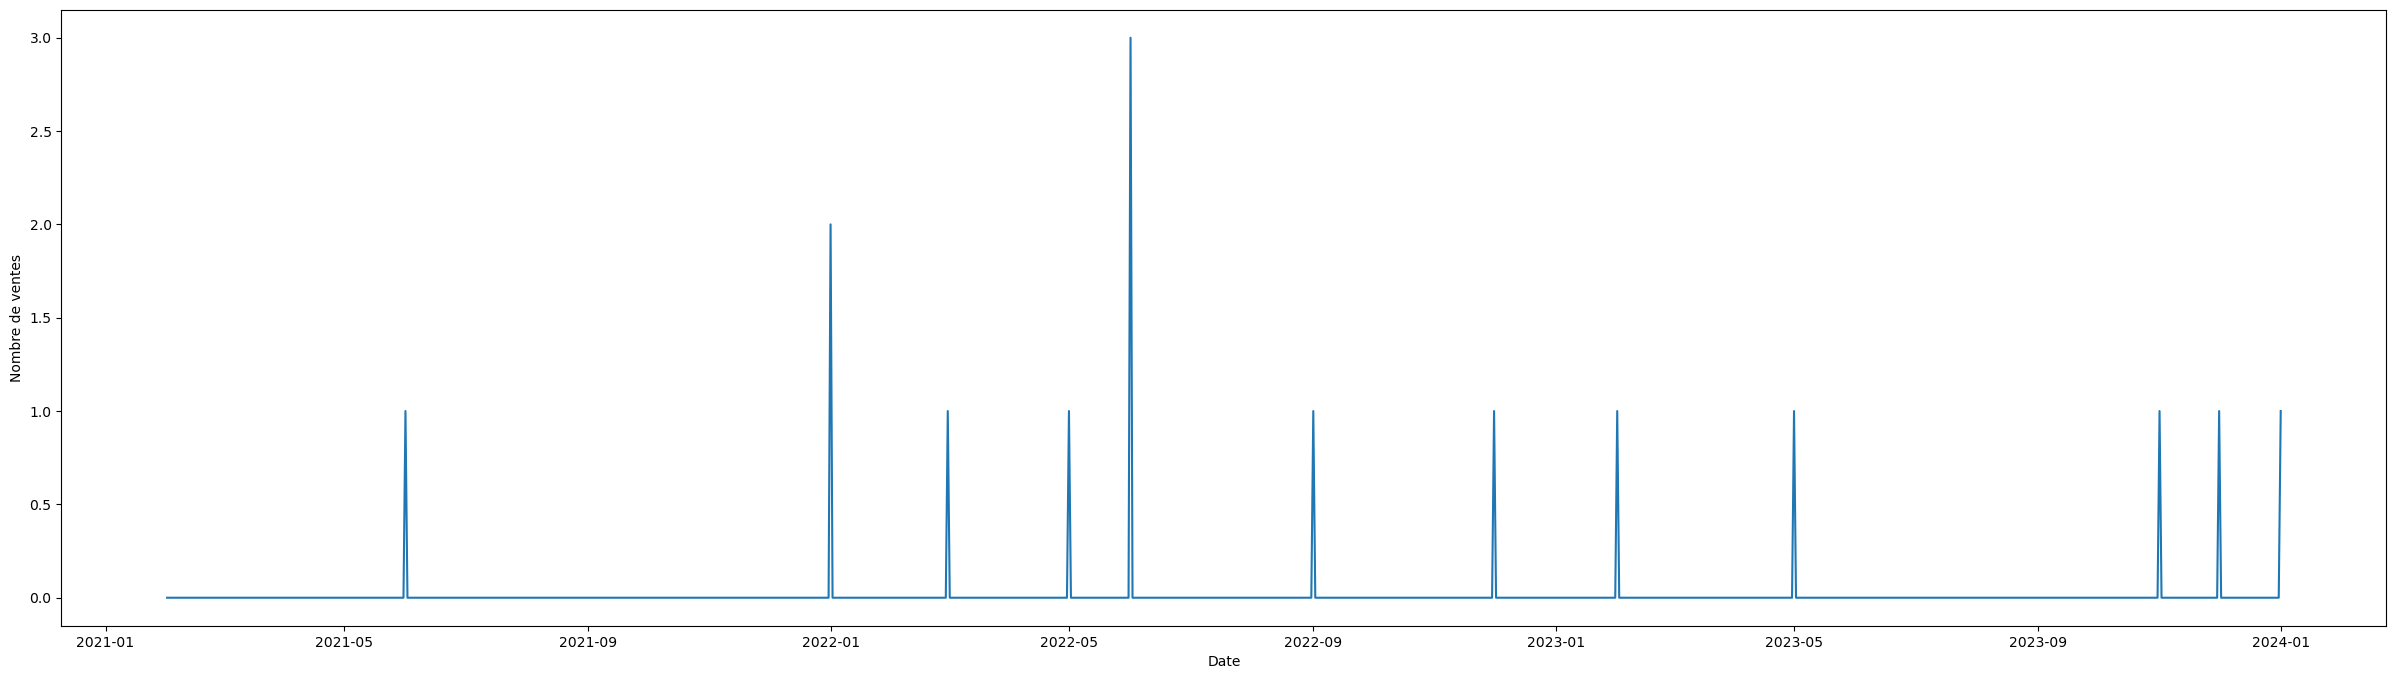

In [72]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:37 - cmdstanpy - INFO - Chain [1] start processing
19:08:37 - cmdstanpy - INFO - Chain [1] done processing


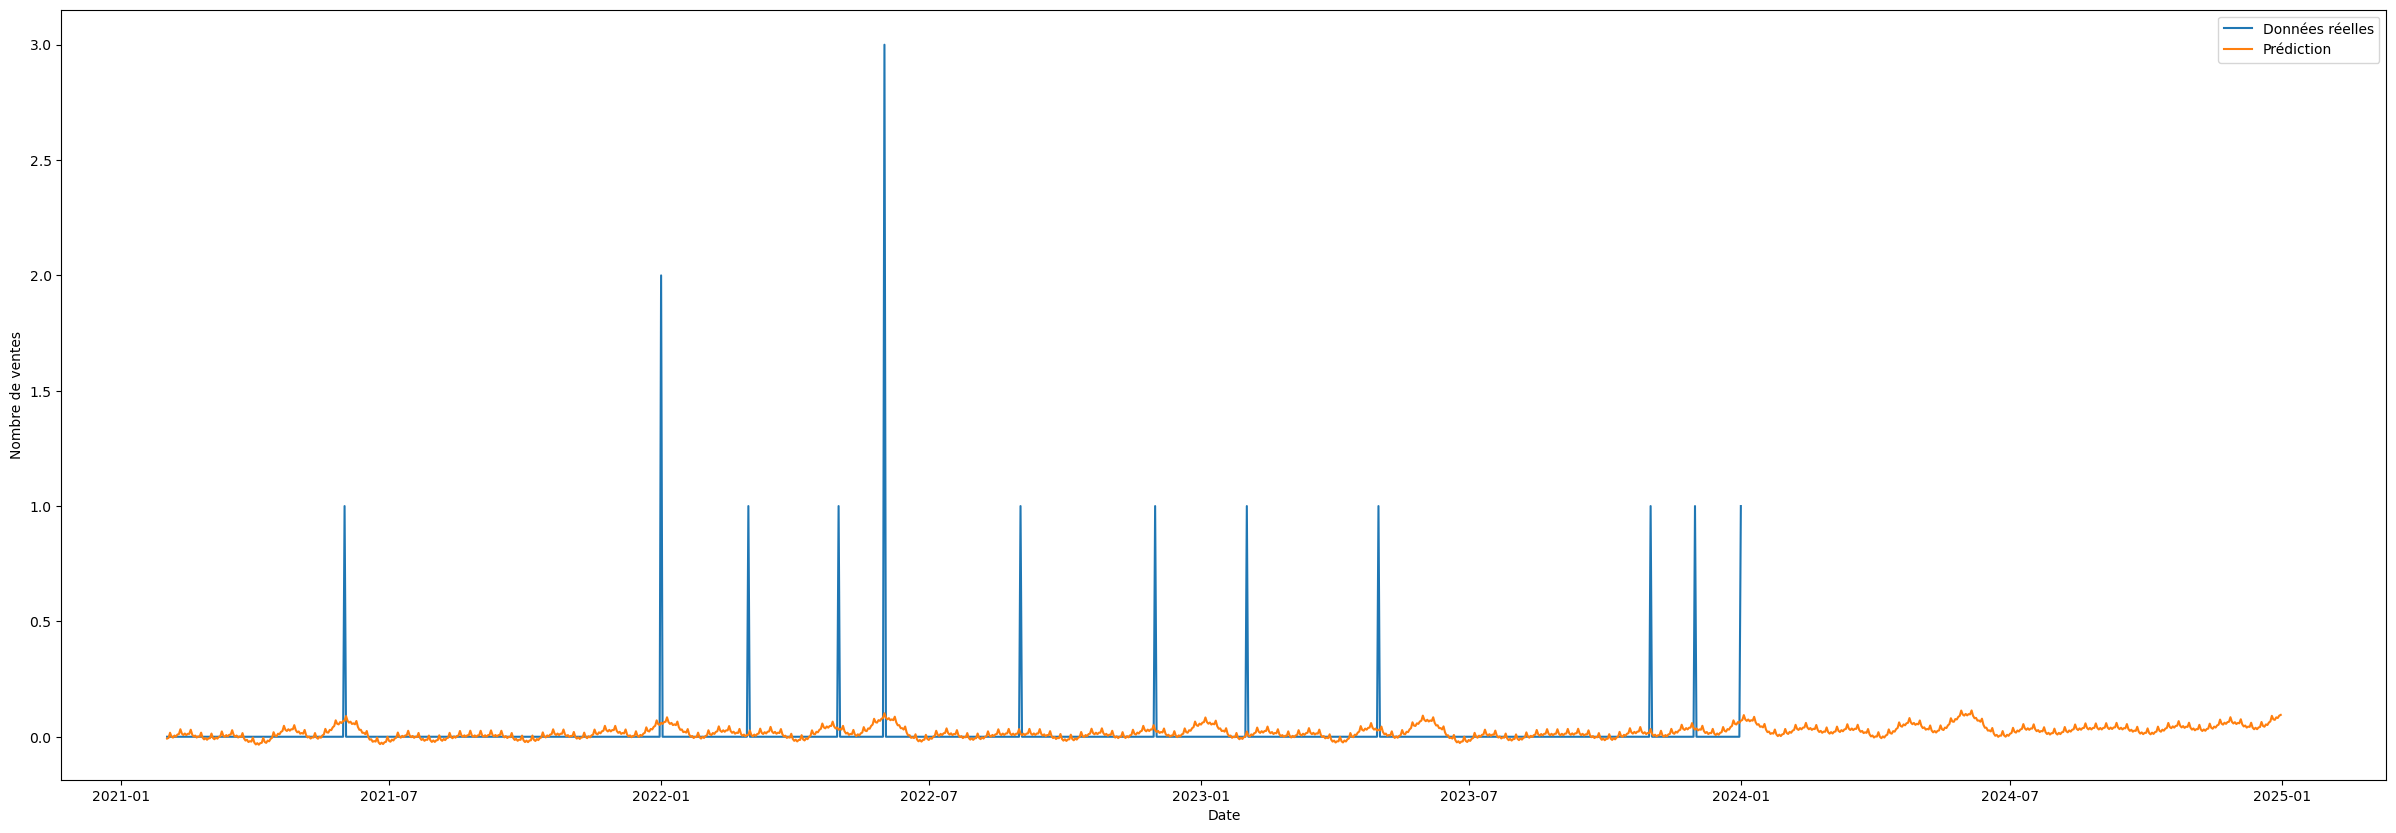

In [73]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.03240427752213294
RMSE: 0.14441600752910205


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.001535
1  2024-04-02  0.000737
2  2024-04-03  0.019763
3  2024-04-04 -0.000105
4  2024-04-05 -0.006207
5  2024-04-06  0.001463
6  2024-04-07 -0.003416
7  2024-04-08  0.005506
8  2024-04-09  0.008793
9  2024-04-10  0.031848
10 2024-04-11  0.015847
11 2024-04-12  0.013344
12 2024-04-13  0.024248
13 2024-04-14  0.022145
14 2024-04-15  0.033306
15 2024-04-16  0.038230
16 2024-04-17  0.062271
17 2024-04-18  0.046572
18 2024-04-19  0.043671
19 2024-04-20  0.053484
20 2024-04-21  0.049620
21 2024-04-22  0.058394
22 2024-04-23  0.060364
23 2024-04-24  0.080961
24 2024-04-25  0.061419
25 2024-04-26  0.054379
26 2024-04-27  0.059867
27 2024-04-28  0.051612
28 2024-04-29  0.056049
29 2024-04-30  0.053856


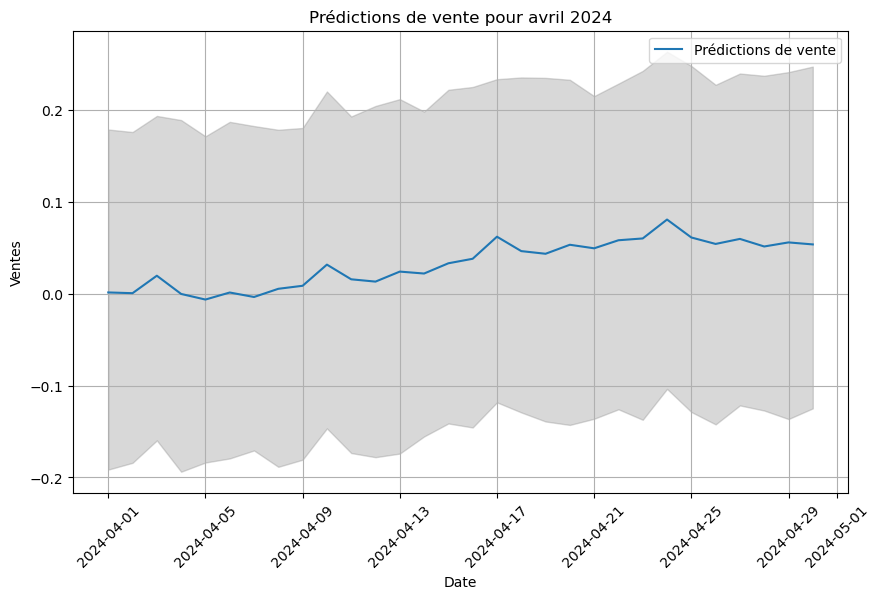

In [75]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [76]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 1


In [77]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Saucisson_de_Lyon_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 1400.0


In [78]:
# import pickle

# # Enregistrer le modèle
# with open('model/Saucisson_de_Lyon.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Saucisson_de_Lyon.pkl'")


**Crème raffermissante pour le corps Garnier**

In [79]:
# Accéder au DataFrame spécifique pour le produit
Crème_raffermissante_pour_le_corps_Garnier_df = sous_dataframes['Crème raffermissante pour le corps Garnier']
Crème_raffermissante_pour_le_corps_Garnier_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Crème_raffermissante_pour_le_corps_Garnier_df.shape[0]} lignes et {Crème_raffermissante_pour_le_corps_Garnier_df.shape[1]} colonnes")
Crème_raffermissante_pour_le_corps_Garnier_df

Le jeu de données a 11 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2021-06-01
1,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2022-05-01
2,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2022-07-01
3,Crème raffermissante pour le corps Garnier,4,8000.0,2000.0,2022-11-01
4,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2022-12-01
5,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-02-01
6,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-04-01
7,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-05-01
8,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-07-01
9,Crème raffermissante pour le corps Garnier,1,2000.0,2000.0,2023-08-01


In [80]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Crème_raffermissante_pour_le_corps_Garnier_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Crème_raffermissante_pour_le_corps_Garnier_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Crème raffermissante pour le corps Garnier", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Crème raffermissante pour le corps Garnier,0.0,0.0,2000.0
1,2021-02-02,Crème raffermissante pour le corps Garnier,0.0,0.0,2000.0
2,2021-02-03,Crème raffermissante pour le corps Garnier,0.0,0.0,2000.0
3,2021-02-04,Crème raffermissante pour le corps Garnier,0.0,0.0,2000.0
4,2021-02-05,Crème raffermissante pour le corps Garnier,0.0,0.0,2000.0


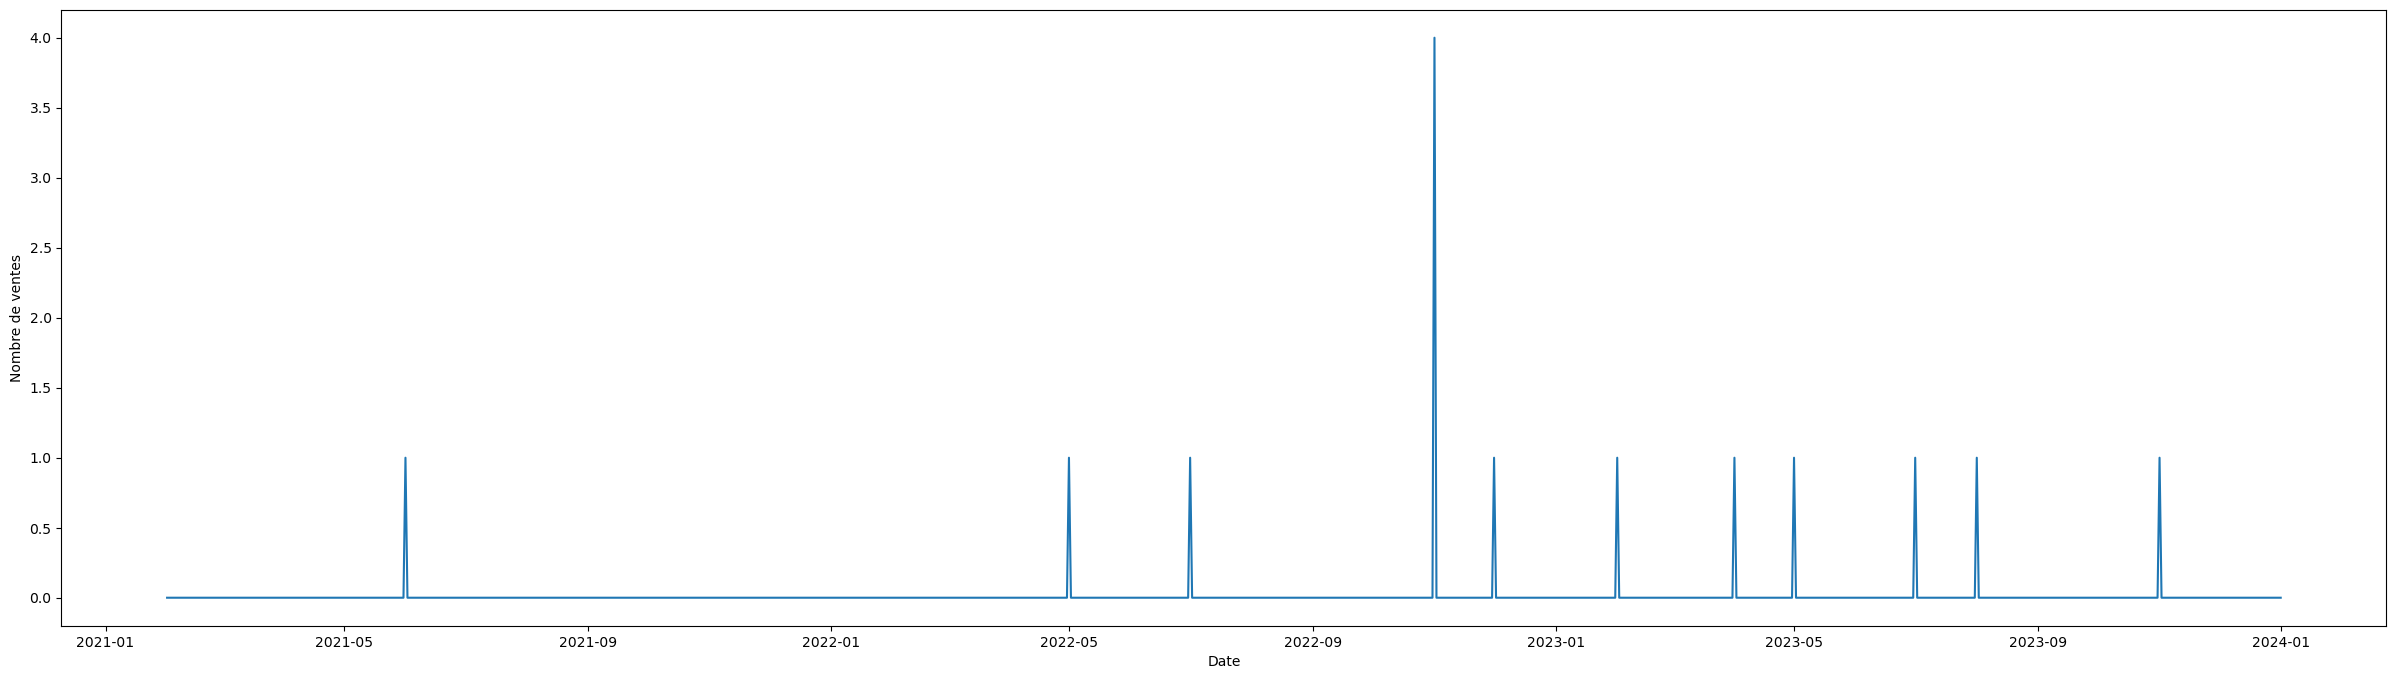

In [81]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:41 - cmdstanpy - INFO - Chain [1] start processing
19:08:41 - cmdstanpy - INFO - Chain [1] done processing


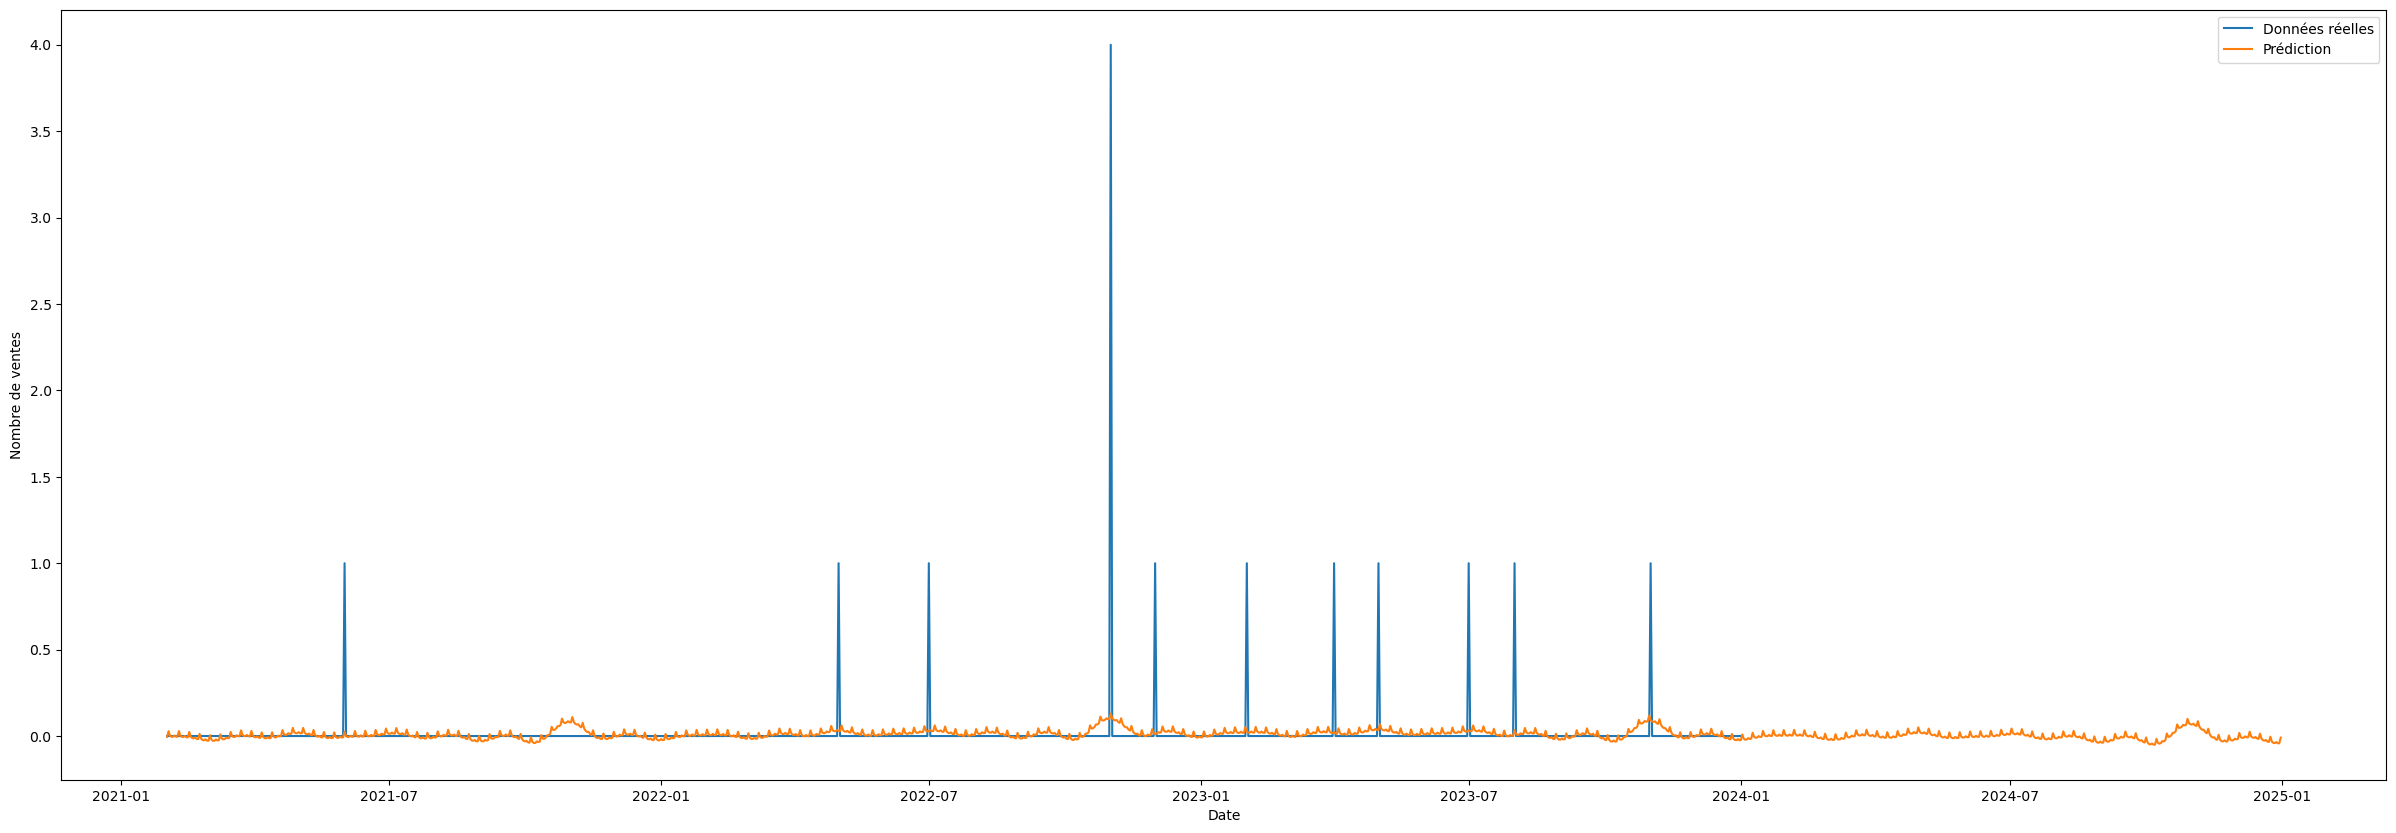

In [82]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.03228527819603671
RMSE: 0.153583355867703


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01 -0.002684
1  2024-04-02  0.028635
2  2024-04-03  0.001054
3  2024-04-04 -0.006739
4  2024-04-05 -0.007834
5  2024-04-06 -0.002186
6  2024-04-07 -0.009460
7  2024-04-08 -0.009895
8  2024-04-09  0.022585
9  2024-04-10 -0.003591
10 2024-04-11 -0.009775
11 2024-04-12 -0.009097
12 2024-04-13 -0.001568
13 2024-04-14 -0.006901
14 2024-04-15 -0.005392
15 2024-04-16  0.028981
16 2024-04-17  0.004592
17 2024-04-18  0.000039
18 2024-04-19  0.002143
19 2024-04-20  0.010856
20 2024-04-21  0.006426
21 2024-04-22  0.008532
22 2024-04-23  0.043175
23 2024-04-24  0.018722
24 2024-04-25  0.013768
25 2024-04-26  0.015144
26 2024-04-27  0.022815
27 2024-04-28  0.017058
28 2024-04-29  0.017583
29 2024-04-30  0.050431


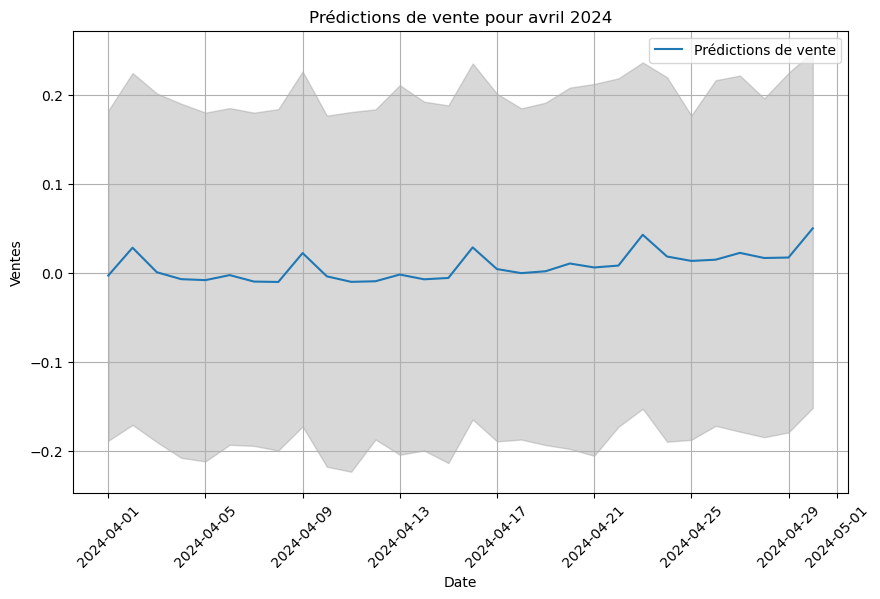

In [84]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [85]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 0


In [86]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Crème_raffermissante_pour_le_corps_Garnier_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 0.0


In [87]:
# import pickle

# # Enregistrer le modèle
# with open('model/Crème_raffermissante_pour_le_corps_Garnier.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Crème_raffermissante_pour_le_corps_Garnier.pkl'")


**Jambon de Luxeuil**

In [88]:
# Accéder au DataFrame spécifique pour le produit
Jambon_de_Luxeuil_df = sous_dataframes['Jambon de Luxeuil']
Jambon_de_Luxeuil_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Jambon_de_Luxeuil_df.shape[0]} lignes et {Jambon_de_Luxeuil_df.shape[1]} colonnes")
Jambon_de_Luxeuil_df

Le jeu de données a 10 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Jambon de Luxeuil,1,2000.0,2000.0,2021-06-01
1,Jambon de Luxeuil,1,2000.0,2000.0,2022-04-01
2,Jambon de Luxeuil,1,2000.0,2000.0,2022-05-01
3,Jambon de Luxeuil,1,2000.0,2000.0,2022-07-01
4,Jambon de Luxeuil,3,6000.0,2000.0,2022-11-01
5,Jambon de Luxeuil,1,2000.0,2000.0,2022-12-01
6,Jambon de Luxeuil,1,2000.0,2000.0,2023-02-01
7,Jambon de Luxeuil,1,2000.0,2000.0,2023-06-01
8,Jambon de Luxeuil,2,4000.0,2000.0,2023-09-01
9,Jambon de Luxeuil,2,4000.0,2000.0,2023-12-01


In [89]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Jambon_de_Luxeuil_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Jambon_de_Luxeuil_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Jambon de Luxeuil", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Jambon de Luxeuil,0.0,0.0,2000.0
1,2021-02-02,Jambon de Luxeuil,0.0,0.0,2000.0
2,2021-02-03,Jambon de Luxeuil,0.0,0.0,2000.0
3,2021-02-04,Jambon de Luxeuil,0.0,0.0,2000.0
4,2021-02-05,Jambon de Luxeuil,0.0,0.0,2000.0


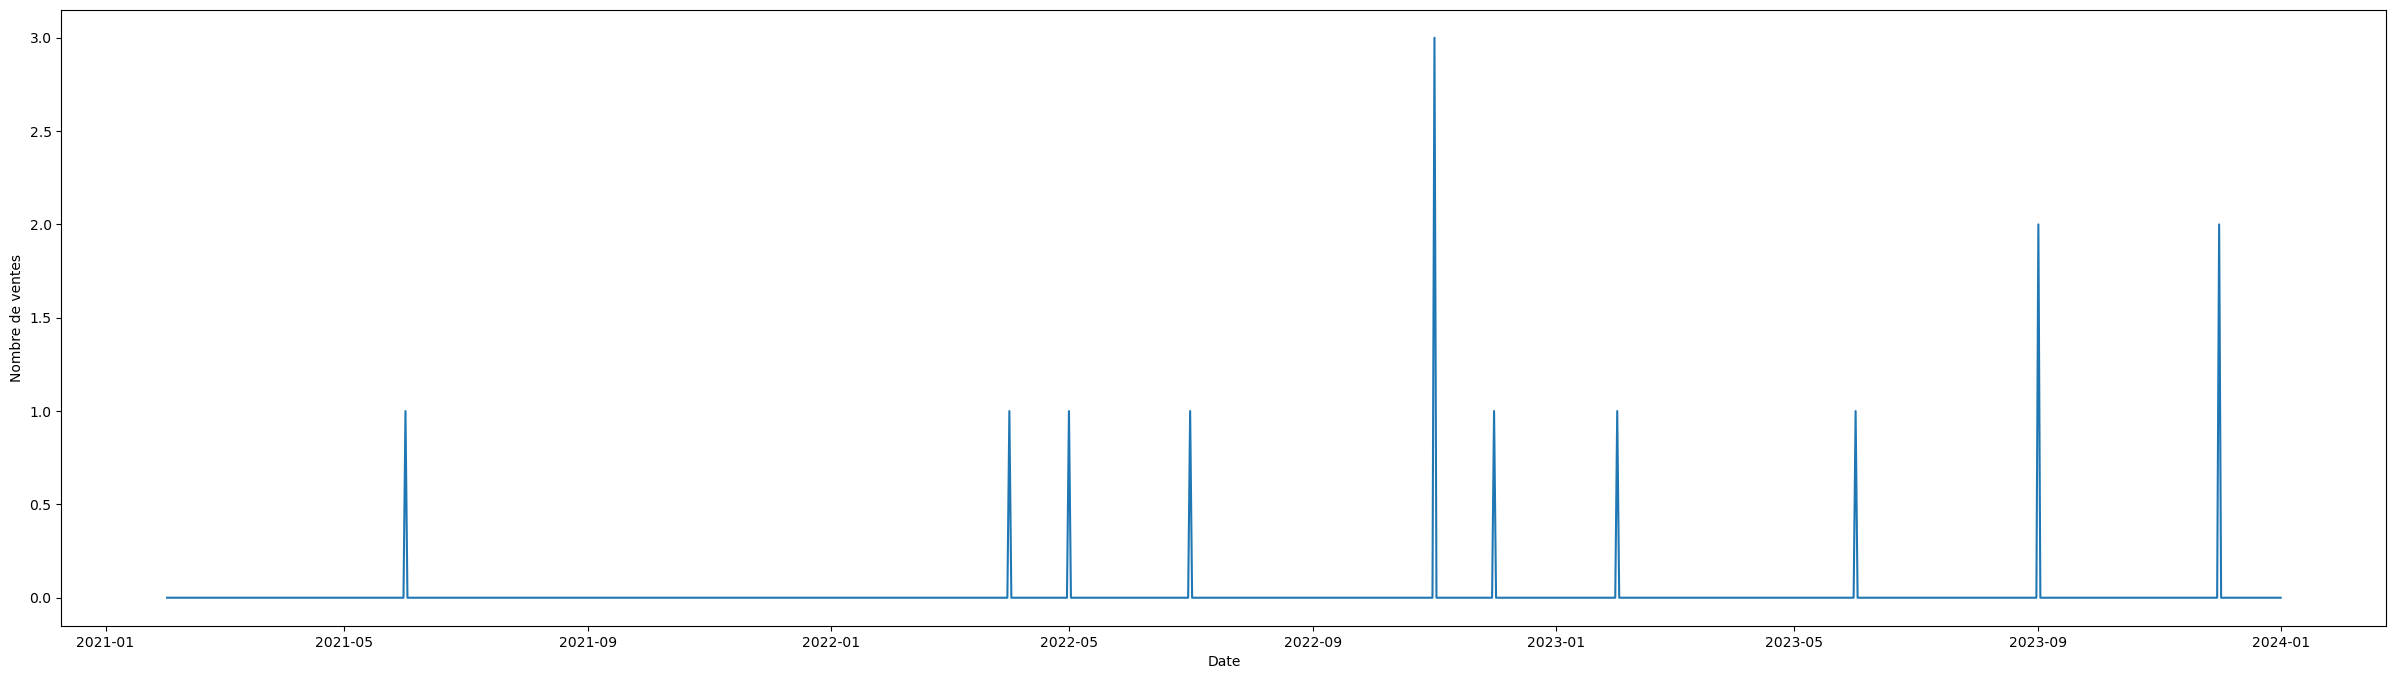

In [90]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:46 - cmdstanpy - INFO - Chain [1] start processing
19:08:46 - cmdstanpy - INFO - Chain [1] done processing


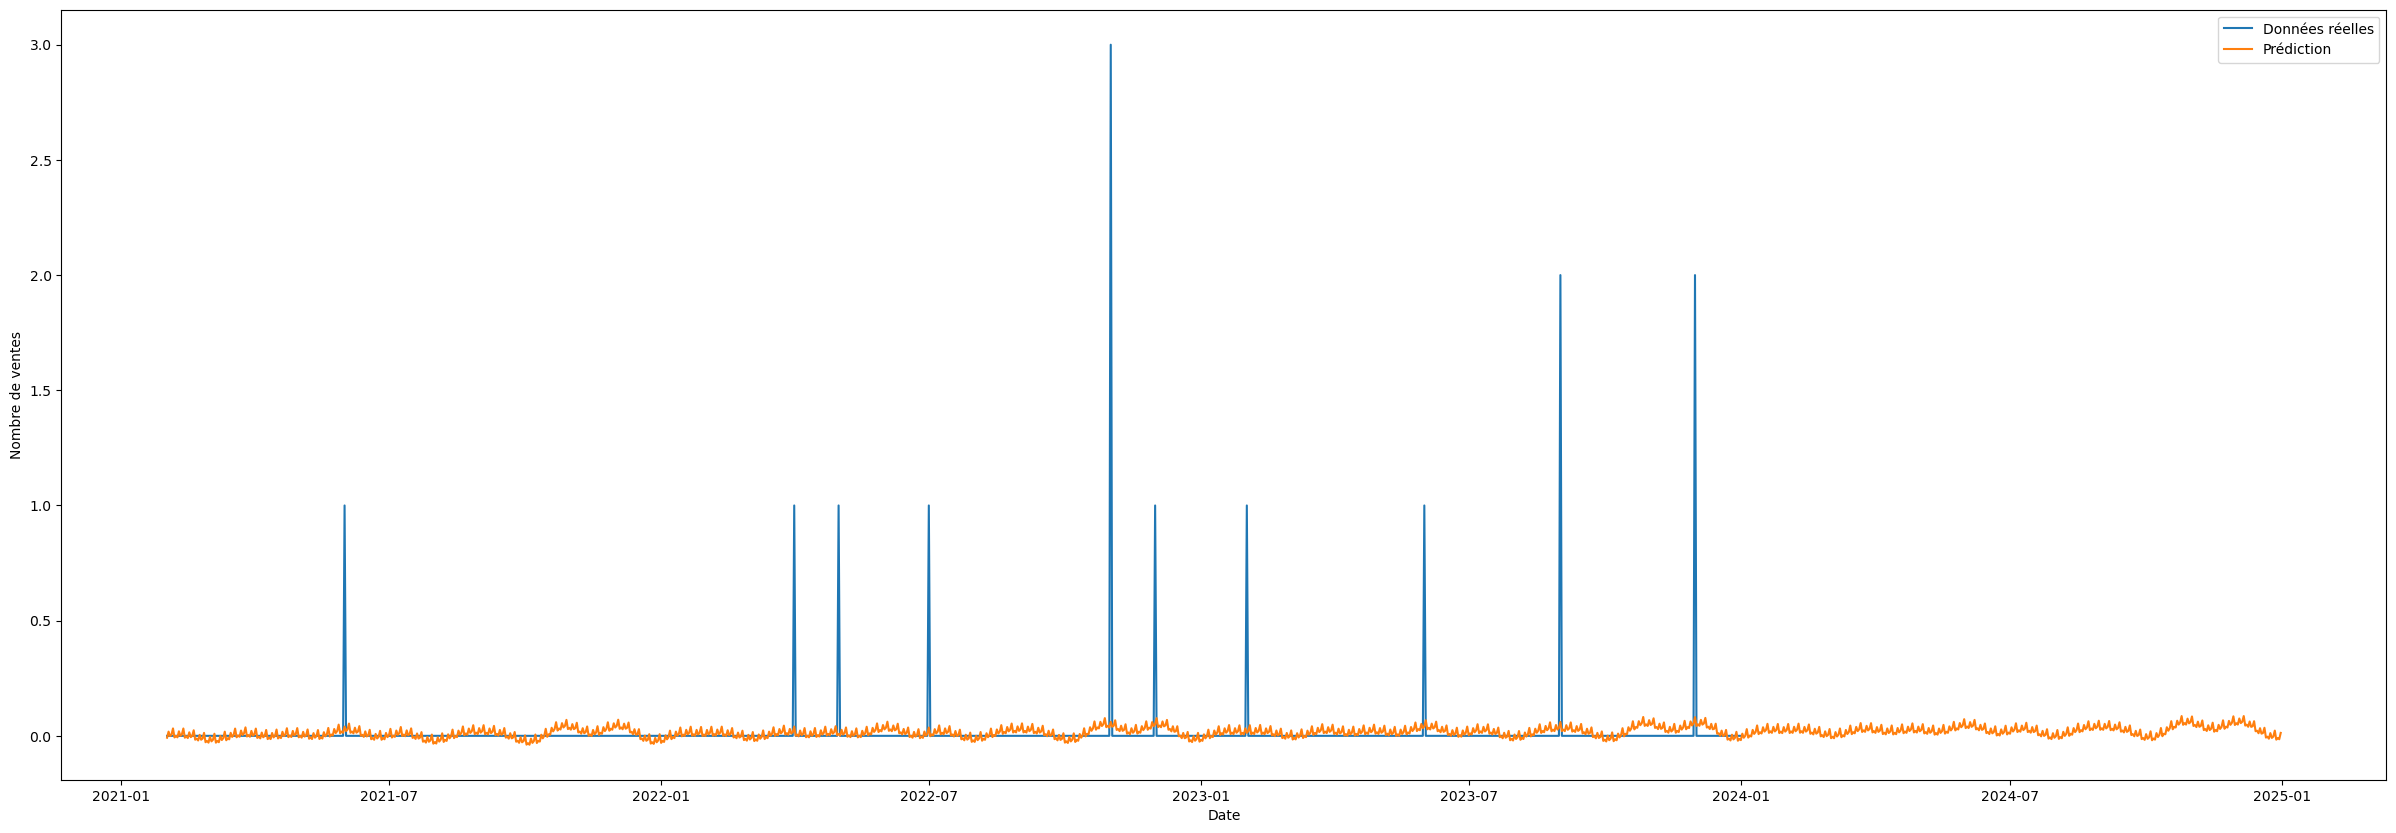

In [91]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.032272411286287994
RMSE: 0.14792241630981856


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.012891
1  2024-04-02  0.037959
2  2024-04-03  0.017169
3  2024-04-04  0.022689
4  2024-04-05  0.047987
5  2024-04-06  0.007697
6  2024-04-07  0.013521
7  2024-04-08  0.006414
8  2024-04-09  0.032151
9  2024-04-10  0.012214
10 2024-04-11  0.018739
11 2024-04-12  0.045154
12 2024-04-13  0.006056
13 2024-04-14  0.013101
14 2024-04-15  0.007204
15 2024-04-16  0.034096
16 2024-04-17  0.015220
17 2024-04-18  0.022677
18 2024-04-19  0.049863
19 2024-04-20  0.011348
20 2024-04-21  0.018769
21 2024-04-22  0.013030
22 2024-04-23  0.039857
23 2024-04-24  0.020696
24 2024-04-25  0.027656
25 2024-04-26  0.054154
26 2024-04-27  0.014784
27 2024-04-28  0.021213
28 2024-04-29  0.014379
29 2024-04-30  0.040050


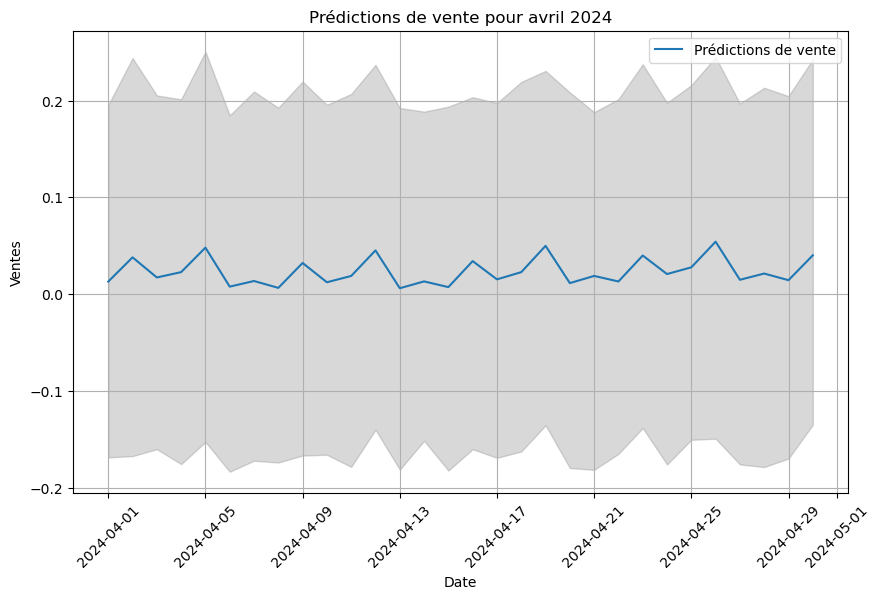

In [93]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [94]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 1


In [95]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Jambon_de_Luxeuil_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 2000.0


In [96]:
# import pickle

# # Enregistrer le modèle
# with open('model/Jambon_de_Luxeuil.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Jambon_de_Luxeuil.pkl'")


**Jambon des Ardennes**

In [97]:
# Accéder au DataFrame spécifique pour le produit
Jambon_des_Ardennes_df = sous_dataframes['Jambon des Ardennes']
Jambon_des_Ardennes_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Jambon_des_Ardennes_df.shape[0]} lignes et {Jambon_des_Ardennes_df.shape[1]} colonnes")
Jambon_des_Ardennes_df

Le jeu de données a 10 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Jambon des Ardennes,1,2000.0,2000.0,2022-02-01
1,Jambon des Ardennes,1,2000.0,2000.0,2022-04-01
2,Jambon des Ardennes,1,2000.0,2000.0,2022-07-01
3,Jambon des Ardennes,1,2000.0,2000.0,2022-09-01
4,Jambon des Ardennes,1,2000.0,2000.0,2022-10-01
5,Jambon des Ardennes,1,2000.0,2000.0,2023-04-01
6,Jambon des Ardennes,2,4000.0,2000.0,2023-05-01
7,Jambon des Ardennes,1,2000.0,2000.0,2023-08-01
8,Jambon des Ardennes,3,6000.0,2000.0,2023-09-01
9,Jambon des Ardennes,2,4000.0,2000.0,2023-10-01


In [98]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Jambon_des_Ardennes_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Jambon_des_Ardennes_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Jambon des Ardennes", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Jambon des Ardennes,0.0,0.0,2000.0
1,2021-02-02,Jambon des Ardennes,0.0,0.0,2000.0
2,2021-02-03,Jambon des Ardennes,0.0,0.0,2000.0
3,2021-02-04,Jambon des Ardennes,0.0,0.0,2000.0
4,2021-02-05,Jambon des Ardennes,0.0,0.0,2000.0


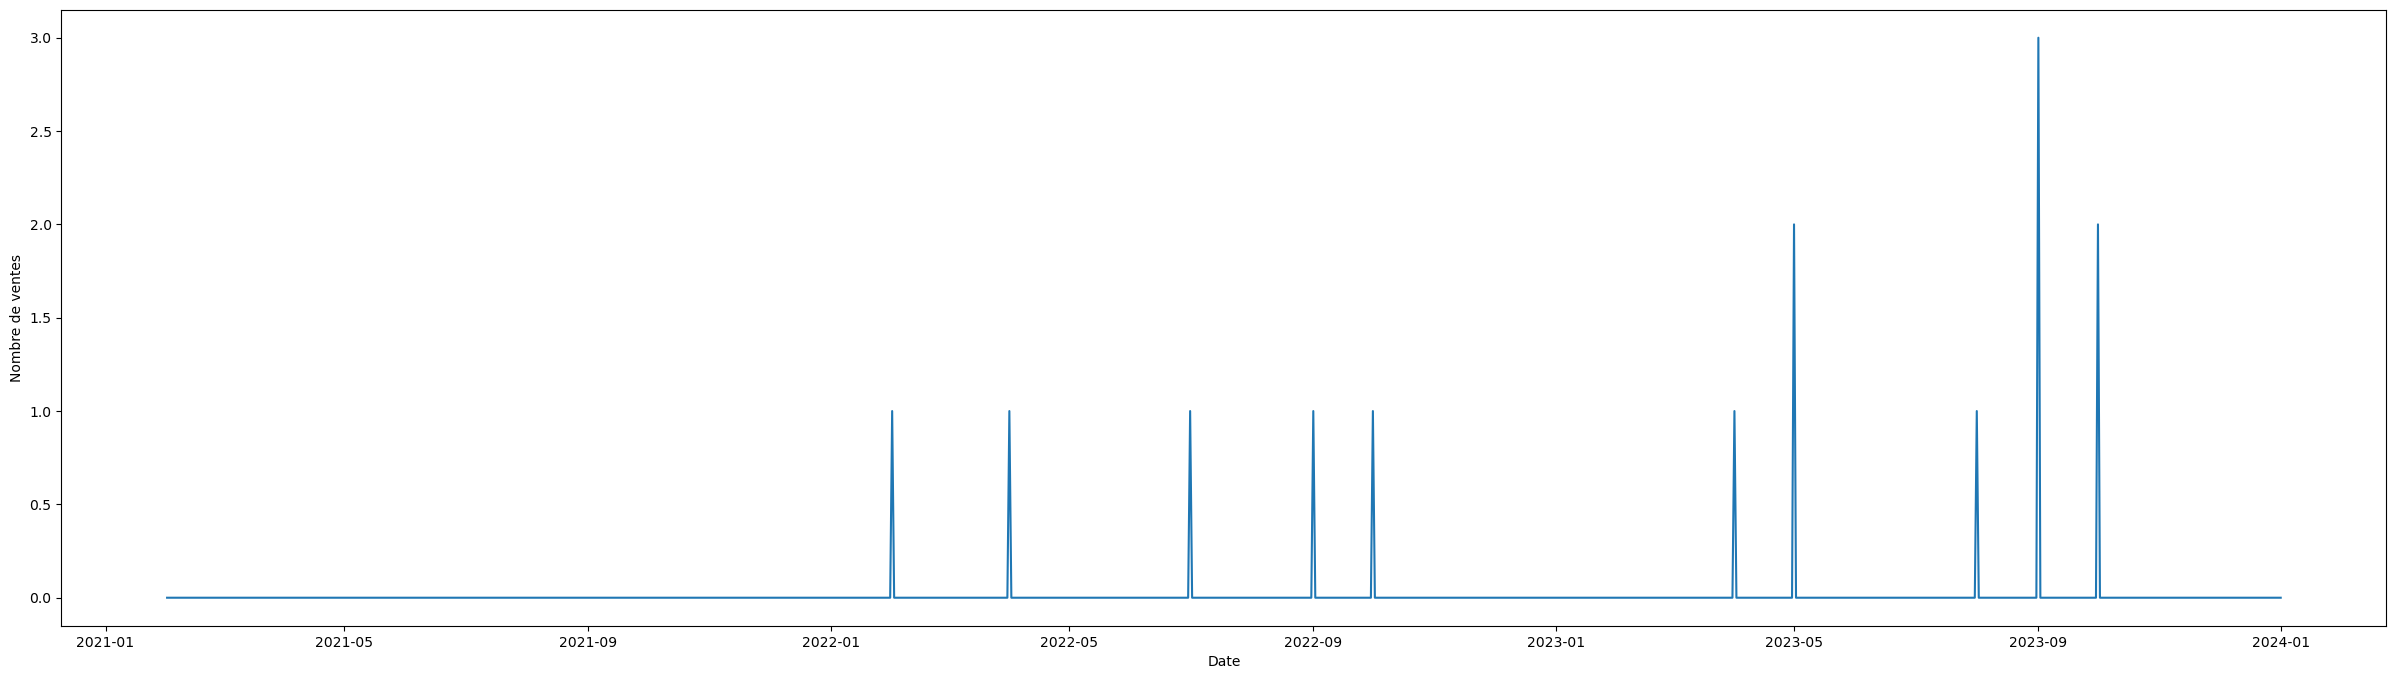

In [99]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] done processing


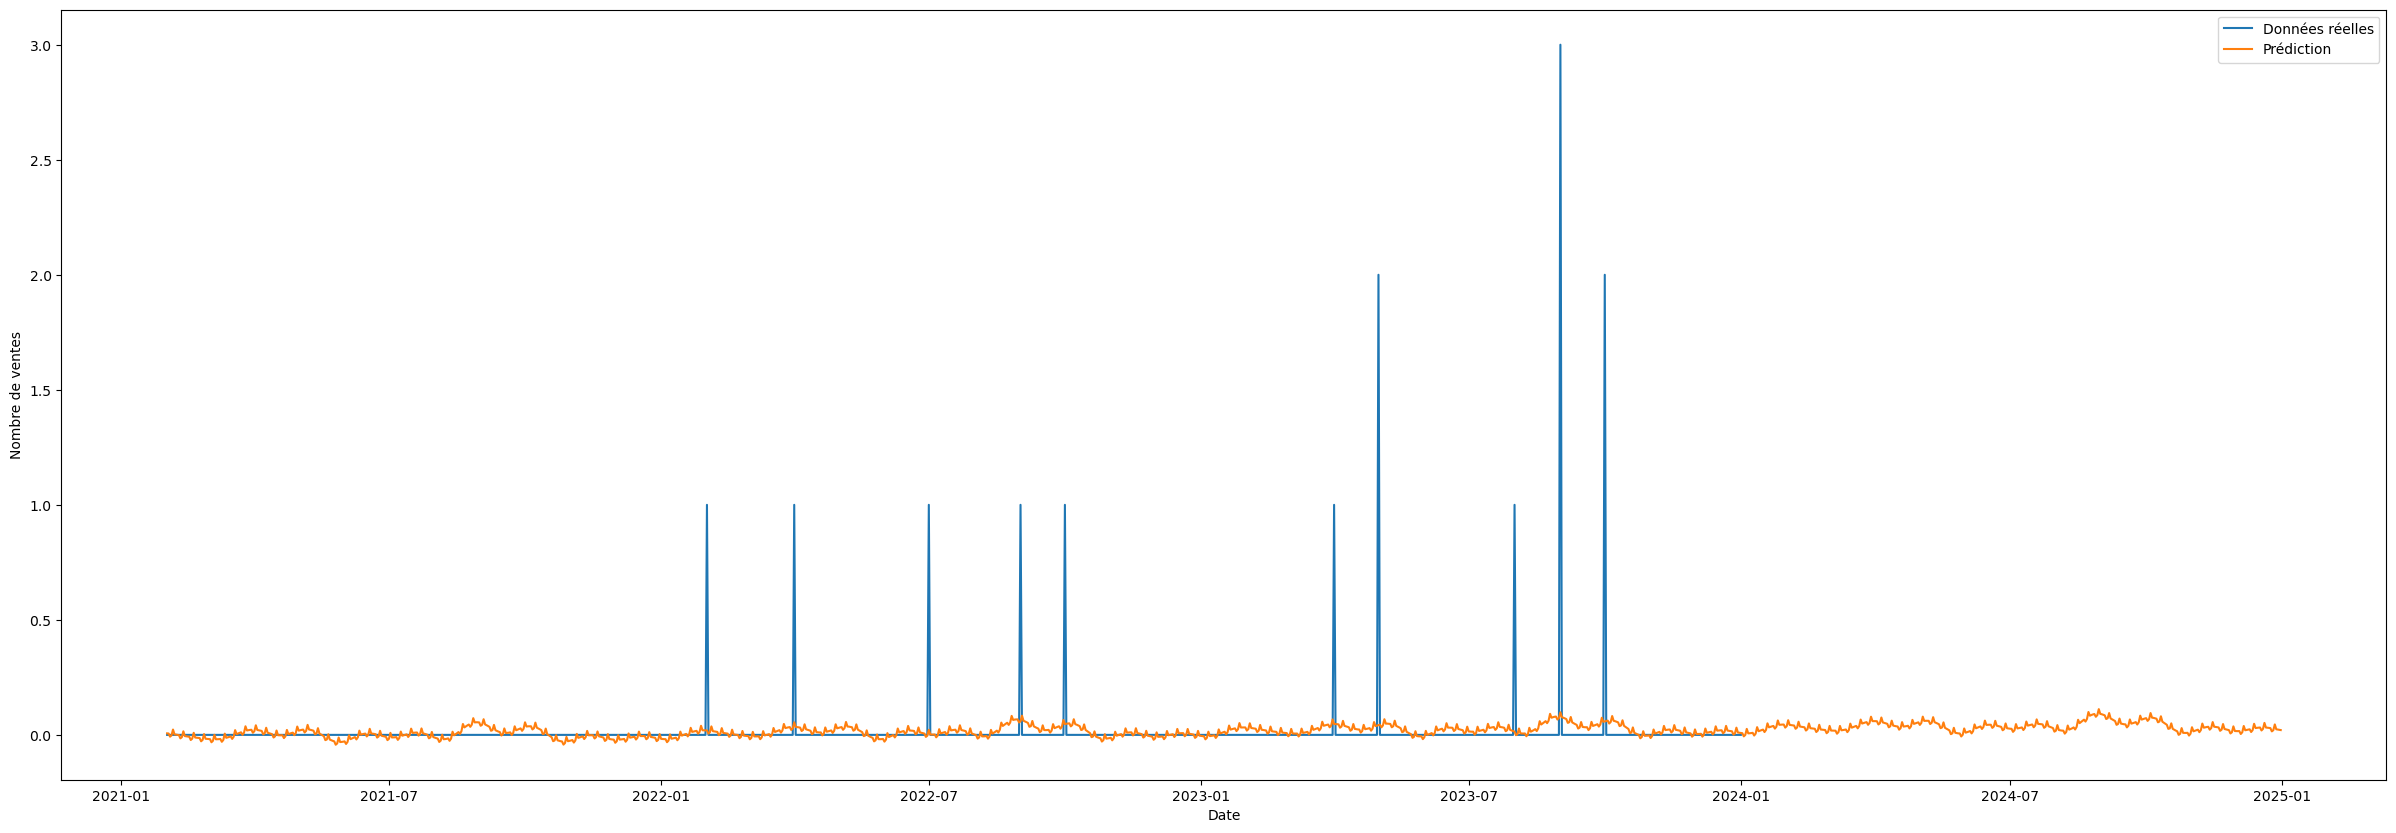

In [100]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.03296025874953243
RMSE: 0.14771315696569726


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.059750
1  2024-04-02  0.059270
2  2024-04-03  0.045227
3  2024-04-04  0.050639
4  2024-04-05  0.075539
5  2024-04-06  0.054089
6  2024-04-07  0.052218
7  2024-04-08  0.050169
8  2024-04-09  0.048141
9  2024-04-10  0.032875
10 2024-04-11  0.037421
11 2024-04-12  0.061840
12 2024-04-13  0.040308
13 2024-04-14  0.038758
14 2024-04-15  0.037428
15 2024-04-16  0.036498
16 2024-04-17  0.022682
17 2024-04-18  0.028991
18 2024-04-19  0.055437
19 2024-04-20  0.036142
20 2024-04-21  0.036976
21 2024-04-22  0.038107
22 2024-04-23  0.039646
23 2024-04-24  0.028233
24 2024-04-25  0.036808
25 2024-04-26  0.065312
26 2024-04-27  0.047803
27 2024-04-28  0.050092
28 2024-04-29  0.052297
29 2024-04-30  0.054487


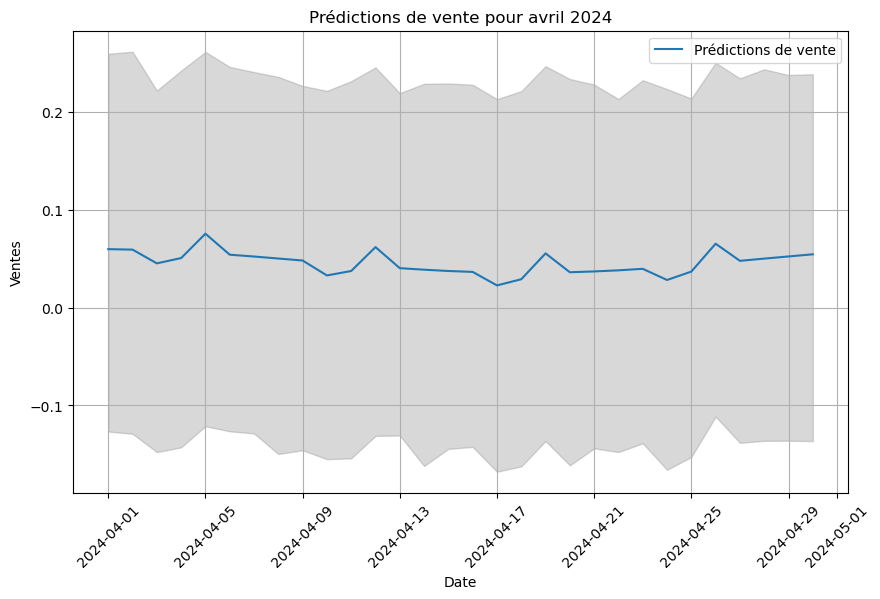

In [102]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [103]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 1


In [104]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Jambon_des_Ardennes_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 2000.0


In [105]:
# import pickle

# # Enregistrer le modèle
# with open('model/Jambon_des_Ardennes.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'Jambon_des_Ardennes.pkl'")


**Jambon de Bayonne**

In [106]:
# Accéder au DataFrame spécifique pour le produit
Jambon_de_Bayonne_df = sous_dataframes['Jambon de Bayonne']
Jambon_de_Bayonne_df.reset_index(drop=True, inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {Jambon_de_Bayonne_df.shape[0]} lignes et {Jambon_de_Bayonne_df.shape[1]} colonnes")
Jambon_de_Bayonne_df

Le jeu de données a 8 lignes et 5 colonnes


,Produit,Nombre de ventes,CA,Prix Unitaire,Date
0,Jambon de Bayonne,1,1900.0,1900.0,2021-02-01
1,Jambon de Bayonne,2,3800.0,1900.0,2022-05-01
2,Jambon de Bayonne,1,1900.0,1900.0,2022-06-01
3,Jambon de Bayonne,2,3800.0,1900.0,2022-07-01
4,Jambon de Bayonne,1,1900.0,1900.0,2022-08-01
5,Jambon de Bayonne,2,3800.0,1900.0,2022-12-01
6,Jambon de Bayonne,3,5700.0,1900.0,2023-12-01
7,Jambon de Bayonne,2,3800.0,1900.0,2024-01-01


In [107]:
# Importer les bibliothèques
from pandas.tseries.offsets import DateOffset

# Définir les dates minimale et maximale
date_min = pd.to_datetime("2021-02-01")
date_max = pd.to_datetime("2024-01-01")

# Créer une liste de dates
dates = pd.date_range(start=date_min, end=date_max, freq='D').to_list()

# Créer un dictionnaire avec les dates
dict_dates = {"Date": dates}

# Convertir le dictionnaire en dataframe
df_dates = pd.DataFrame(dict_dates)

# Fusionner les dataframes
df_suréchantillonné = df_dates.merge(Jambon_de_Bayonne_df, how='left', on='Date')

# Remplacer les valeurs NaN par 0 pour "Nombre de ventes" et "CA"
df_suréchantillonné['Nombre de ventes'].fillna(0, inplace=True)
df_suréchantillonné['CA'].fillna(0, inplace=True)

# gestion des valeurs manquantes dans "Prix Unitaire" et Produit "Prix Unitaire"
df_suréchantillonné["Prix Unitaire"].replace(np.nan, Jambon_de_Bayonne_df["Prix Unitaire"].median(), inplace=True)
df_suréchantillonné["Produit"].replace(np.nan, "Jambon de Bayonne", inplace=True)

# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {df_suréchantillonné.shape[0]} lignes et {df_suréchantillonné.shape[1]} colonnes")

# afficher le dataframe
df_suréchantillonné.head()

Le jeu de données a 1065 lignes et 5 colonnes


,Date,Produit,Nombre de ventes,CA,Prix Unitaire
0,2021-02-01,Jambon de Bayonne,1.0,1900.0,1900.0
1,2021-02-02,Jambon de Bayonne,0.0,0.0,1900.0
2,2021-02-03,Jambon de Bayonne,0.0,0.0,1900.0
3,2021-02-04,Jambon de Bayonne,0.0,0.0,1900.0
4,2021-02-05,Jambon de Bayonne,0.0,0.0,1900.0


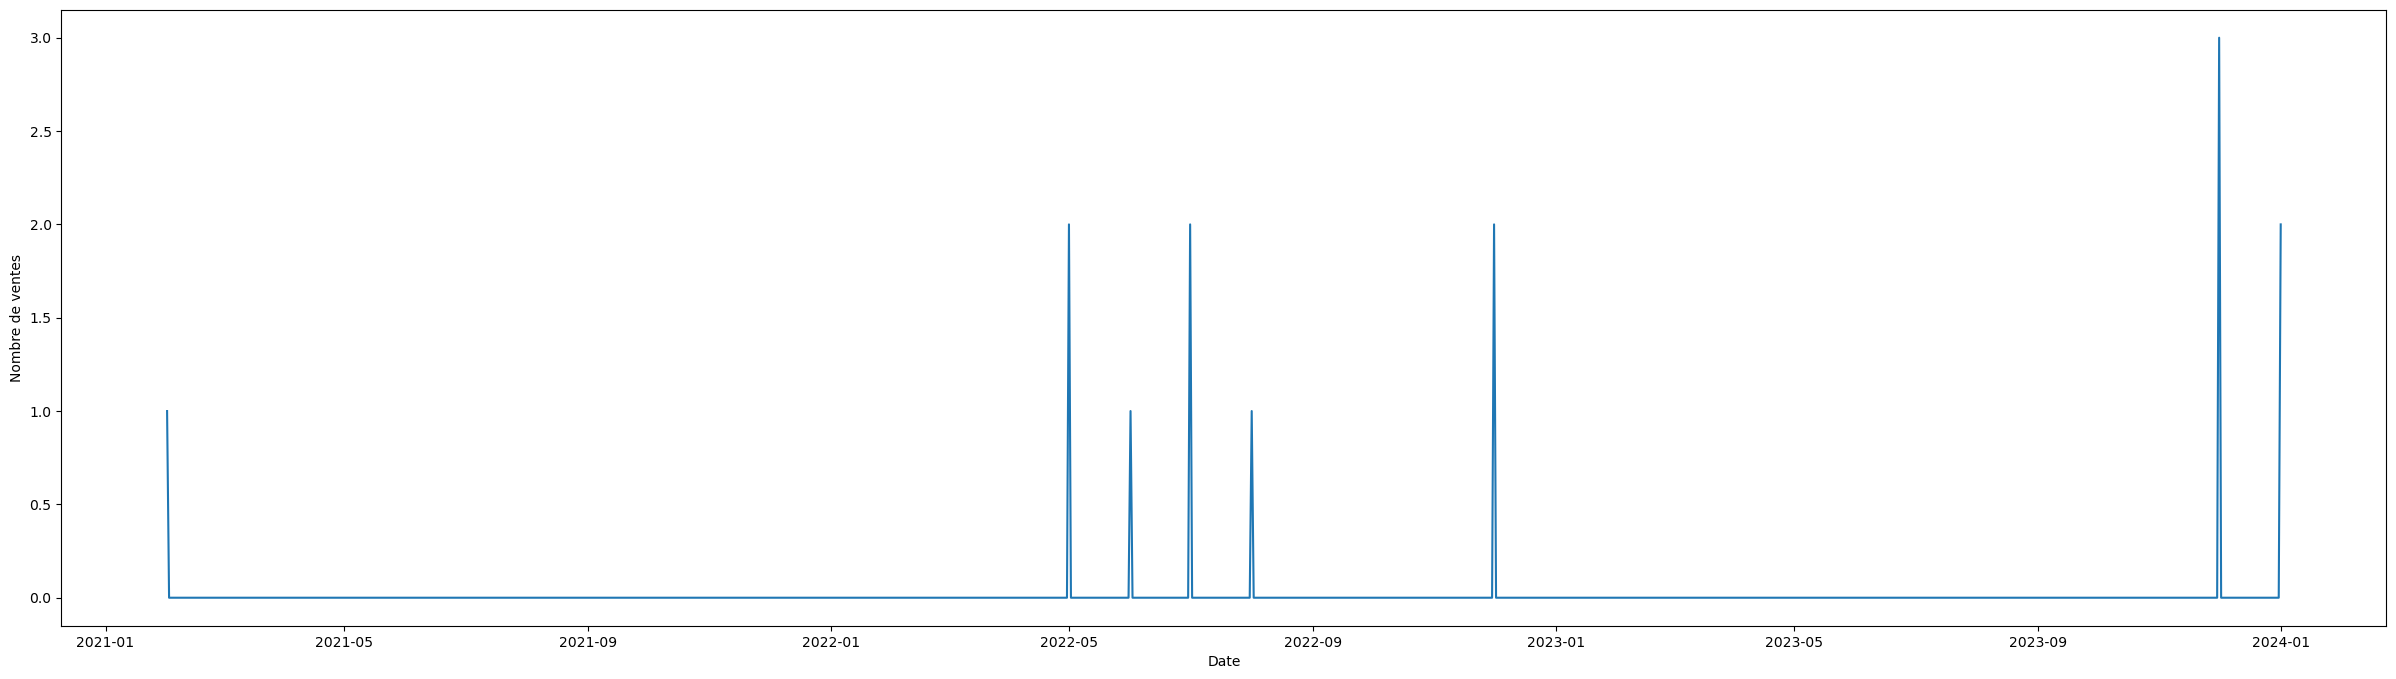

In [108]:
### Graphique linéaire
plt.figure(figsize=(30,8))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"])
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.show()

19:08:54 - cmdstanpy - INFO - Chain [1] start processing
19:08:54 - cmdstanpy - INFO - Chain [1] done processing


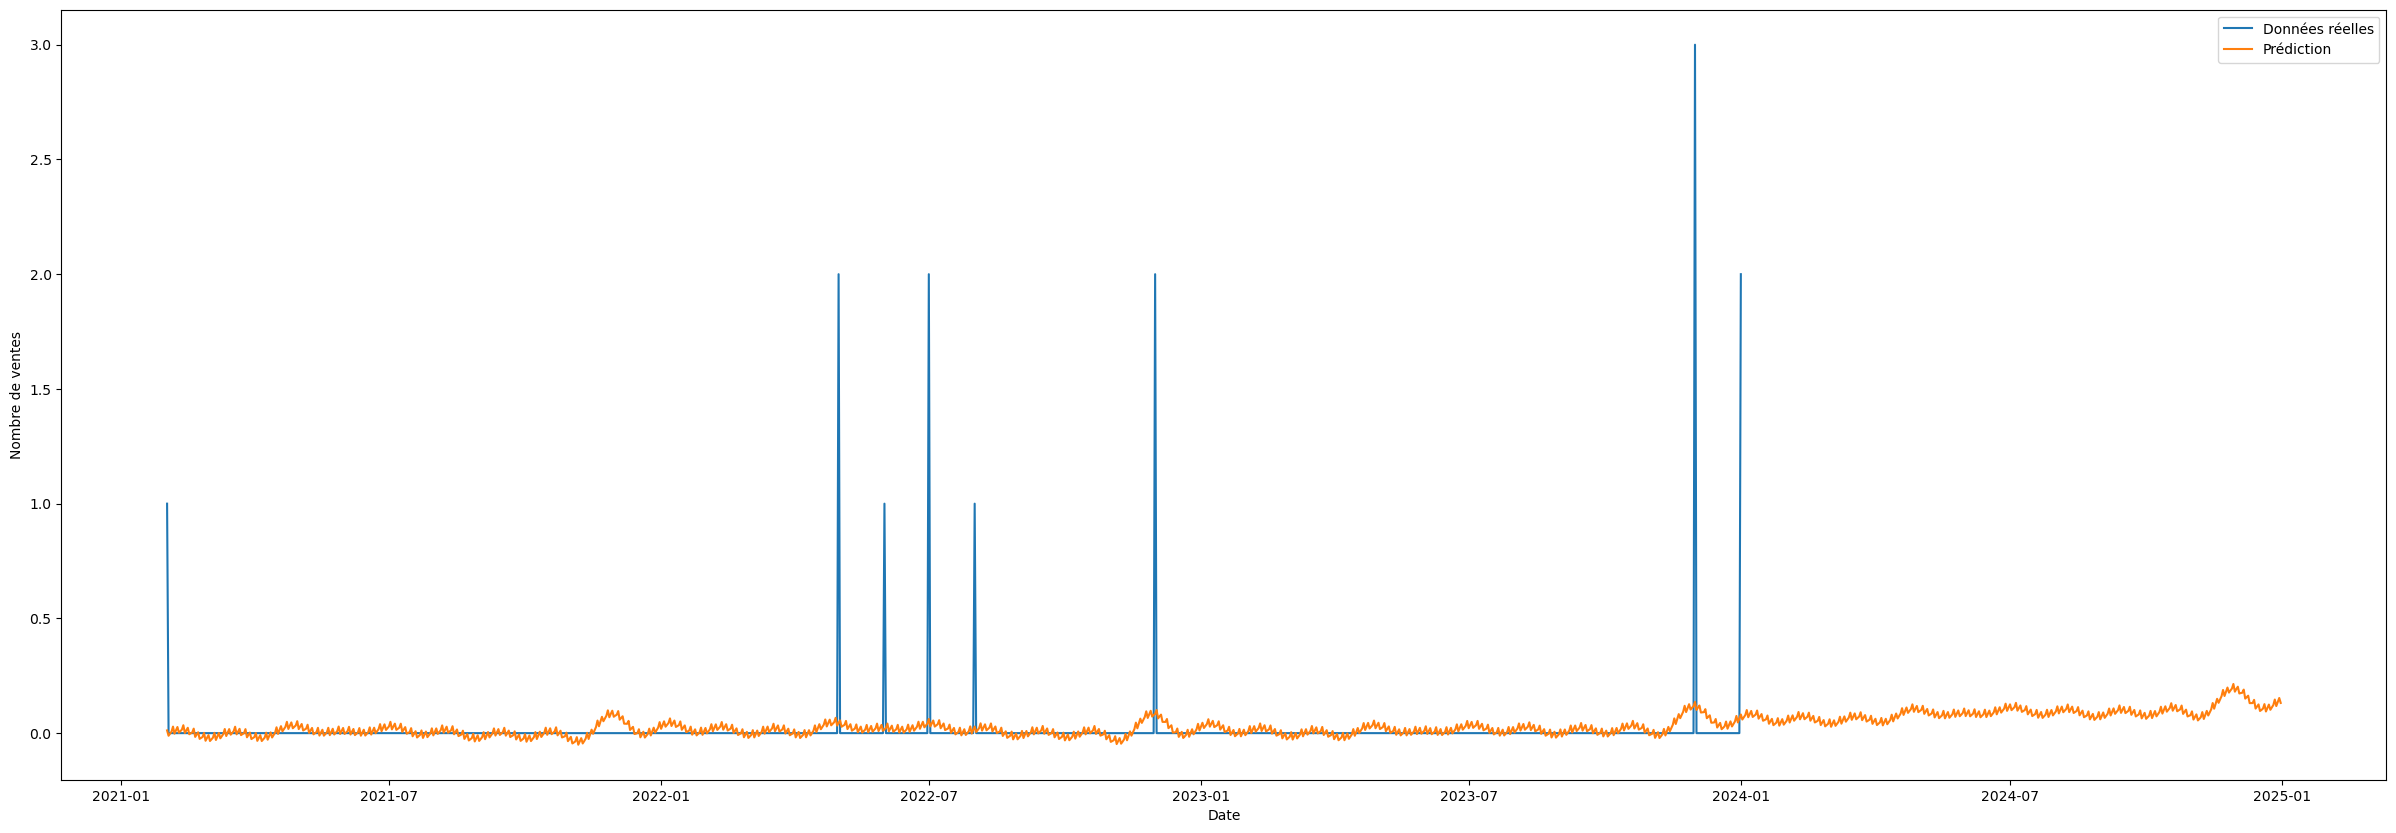

In [109]:
# installation de prophet
# !pip install prophet

# Importer la bibliothèque Prophet
from prophet import Prophet

# Créer un dataframe Prophet:
df_prophet = df_suréchantillonné.copy()
df_prophet['ds'] = df_prophet['Date']
df_prophet['y'] = df_prophet['Nombre de ventes']

# Initialiser le modèle Prophet
model = Prophet()

# Ajuster le modèle aux données:
model.fit(df_prophet)

# Prédire les ventes futures:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


# Visualiser la prédiction:
plt.figure(figsize=(30,10))
plt.plot(df_suréchantillonné["Date"], df_suréchantillonné["Nombre de ventes"], label='Données réelles')
plt.plot(forecast['ds'], forecast['yhat'], label='Prédiction')
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculer MAE
mae = mean_absolute_error(df_prophet['y'], forecast['yhat'][:-365])

# Calculer RMSE
rmse = mean_squared_error(df_prophet['y'], forecast['yhat'][:-365], squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.034020154507343706
RMSE: 0.15902205287550272


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


           ds      yhat
0  2024-04-01  0.062536
1  2024-04-02  0.035218
2  2024-04-03  0.040681
3  2024-04-04  0.046618
4  2024-04-05  0.066226
5  2024-04-06  0.033739
6  2024-04-07  0.047853
7  2024-04-08  0.062432
8  2024-04-09  0.038687
9  2024-04-10  0.047791
10 2024-04-11  0.057340
11 2024-04-12  0.080432
12 2024-04-13  0.051210
13 2024-04-14  0.068282
14 2024-04-15  0.085435
15 2024-04-16  0.063811
16 2024-04-17  0.074530
17 2024-04-18  0.085145
18 2024-04-19  0.108730
19 2024-04-20  0.079417
20 2024-04-21  0.095820
21 2024-04-22  0.111747
22 2024-04-23  0.088376
23 2024-04-24  0.096877
24 2024-04-25  0.104864
25 2024-04-26  0.125483
26 2024-04-27  0.092945
27 2024-04-28  0.105951
28 2024-04-29  0.118397
29 2024-04-30  0.091550


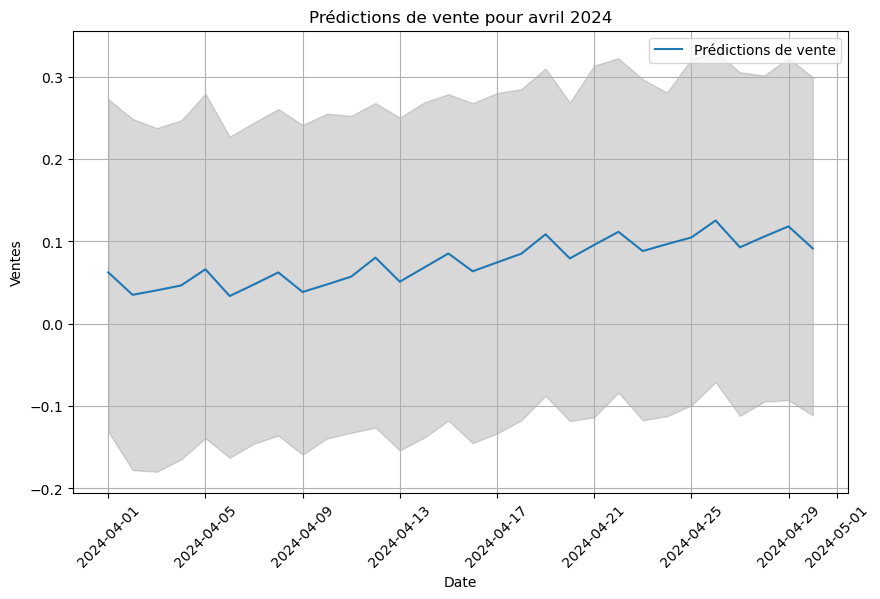

In [111]:
# Prédire les ventes pour avril 2024
start_date = '2024-04-01'
end_date = '2024-04-30'
periods = 30  # Nombre de jours en avril
freq = 'D'  # Fréquence quotidienne
future = pd.date_range(start=start_date, end=end_date, freq=freq)
future = pd.DataFrame({'ds': future})
forecast = model.predict(future)

# Afficher les prédictions d'avril 2024
print(forecast[['ds', 'yhat']][forecast['ds'].dt.month == 4])

# Afficher les prédictions d'avril 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Prédictions de vente')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.title('Prédictions de vente pour avril 2024')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [112]:
# Calculer le chiffre total des ventes pour avril 2024
chiffre_total_avril_2024 = round(forecast['yhat'][forecast['ds'].dt.month == 4].sum())

# Afficher le chiffre total des ventes pour avril 2024
print("Chiffre total des ventes pour avril 2024 :", chiffre_total_avril_2024)

Chiffre total des ventes pour avril 2024 : 2


In [113]:
# Médiane du prix unitaire du produit (supposons que Saucisson_à_la_pistache_df["Prix Unitaire"] contient les prix unitaires)
prix_unitaire_median = Jambon_de_Bayonne_df["Prix Unitaire"].median()

# Calculer le chiffre d'affaires pour avril 2024
chiffre_affaires_avril_2024 = chiffre_total_avril_2024 * prix_unitaire_median

# Afficher le chiffre d'affaires pour avril 2024
print("Chiffre d'affaires pour avril 2024 :", chiffre_affaires_avril_2024)


Chiffre d'affaires pour avril 2024 : 3800.0


In [114]:
# import pickle

# # Enregistrer le modèle
# with open('model/predict_tomate.pkl', 'wb') as f:
#     pickle.dump(model, f)

# print("Modèle enregistré sous le nom 'predict_tomate.pkl'")


# **MERCI !!**

# Code test deployement

In [116]:
import pickle
import pandas as pd
from prophet import Prophet
import calendar

def predict_sales_for_month(year, month, model):
    # Nombre de jours dans le mois spécifié
    days_in_month = calendar.monthrange(year, month)[1]
    
    # Créer la plage de dates pour le mois spécifié
    start_date = f'{year}-{month:02d}-01'
    end_date = f'{year}-{month:02d}-{days_in_month}'
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Préparer le dataframe pour la prédiction
    future = pd.DataFrame({'ds': future_dates})
    
    # Prédire les ventes pour le mois donné
    forecast = model.predict(future)
    
    # Calculer le chiffre total des ventes pour le mois
    total_sales = round(forecast['yhat'].sum())
    
    # Afficher le chiffre total des ventes
    print(f"Chiffre total des ventes pour {calendar.month_name[month]} {year} :", total_sales)

# Exemple d'utilisation:
# Charger le modèle (supposons que le modèle est déjà entraîné et chargé)
with open('model/Jambon_de_Bayonne.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Prédire les ventes pour avril 2024
predict_sales_for_month(2024, 4, loaded_model)


Chiffre total des ventes pour April 2024 : 2


In [117]:
import os
import pickle
import pandas as pd
from prophet import Prophet
import calendar

def predict_sales_for_month(year, month, model_path):
    days_in_month = calendar.monthrange(year, month)[1]
    start_date = f'{year}-{month:02d}-01'
    end_date = f'{year}-{month:02d}-{days_in_month}'
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    future = pd.DataFrame({'ds': future_dates})
    forecast = model.predict(future)
    total_sales = round(forecast['yhat'].sum())
    
    return total_sales

def compare_models_for_month(year, month, models_folder, prices, types):
    results_list = []
    for model_file in os.listdir(models_folder):
        if model_file.endswith('.pkl'):
            model_path = os.path.join(models_folder, model_file)
            total_sales = predict_sales_for_month(year, month, model_path)
            revenue = total_sales * prices[model_file]
            product_type = types[model_file]
            results_list.append({
                'Product': model_file.replace('.pkl', ''),
                'Type': product_type,
                'Vente': total_sales,
                'CA': revenue
            })
    
    results_df = pd.DataFrame(results_list)
    return results_df

# Exemple de dictionnaire des types et des prix
types = {
    'coppa.pkl': 'Charcuterie',
    'Crème_raffermissante_pour_le_corps_Garnier.pkl': 'Produits de soin pour le corps',
    'Jambon_des_Ardennes.pkl': 'Charcuterie',
    'Jambon_de_Bayonne.pkl': 'Charcuterie',
    'Jambon_de_Luxeuil.pkl': 'Charcuterie',
    'Rillettes_doie.pkl': 'Charcuterie',
    'Saucisson_aux_noisettes.pkl': 'Charcuterie',
    'Saucisson_de_Lyon.pkl': 'Charcuterie',
    'Saucisson_à_la_pistache.pkl': 'Charcuterie',
    'Sérum_hydratant_Vichy.pkl': 'Produits de soin pour le corps'
}
prices = {
    'coppa.pkl': 1600.0,
    'Crème_raffermissante_pour_le_corps_Garnier.pkl': 2000.0,
    'Jambon_des_Ardennes.pkl': 2000.0,
    'Jambon_de_Bayonne.pkl': 1900.0,
    'Jambon_de_Luxeuil.pkl': 2000.0,
    'Rillettes_doie.pkl': 1500.0,
    'Saucisson_aux_noisettes.pkl': 1400.0,
    'Saucisson_de_Lyon.pkl': 1400.0,
    'Saucisson_à_la_pistache.pkl': 1600.0,
    'Sérum_hydratant_Vichy.pkl': 3000.0
}


# prediction
df_results = compare_models_for_month(2024, 12, 'model', prices, types)

#trier le dataframe 
df_results=df_results.sort_values(by=['Vente', 'CA'], ascending=False)

#renitialiser l'index
df_results.reset_index(drop=True, inplace=True)

#afficher le dataframe
df_results

,Product,Type,Vente,CA
0,Saucisson_à_la_pistache,Charcuterie,6,9600.0
1,Jambon_de_Bayonne,Charcuterie,4,7600.0
2,Saucisson_aux_noisettes,Charcuterie,2,2800.0
3,Saucisson_de_Lyon,Charcuterie,2,2800.0
4,Sérum_hydratant_Vichy,Produits de soin pour le corps,1,3000.0
5,Jambon_des_Ardennes,Charcuterie,1,2000.0
6,Jambon_de_Luxeuil,Charcuterie,1,2000.0
7,coppa,Charcuterie,1,1600.0
8,Crème_raffermissante_pour_le_corps_Garnier,Produits de soin pour le corps,0,0.0
9,Rillettes_doie,Charcuterie,0,0.0


# code test insertion bd

In [120]:
# Affichez les dimensions du jeu de données
print(f"Le jeu de données a {data.shape[0]} lignes et {data.shape[1]} colonnes")

# Affichez les 5 premières lignes
data.head()

Le jeu de données a 2619 lignes et 7 colonnes


,id,Name,Gender,Produit,Type,Prix,Date
0,1895.0,Mason Taylor,Male,Boîte de mouchoirs en papier Tempo,Hygiène,750.0,2021-01-01 09:54:04
1,1961.0,Kwesi Bonsu,Male,Lingettes démaquillantes biodégradables Nivea,Produits de démaquillage,800.0,2021-01-04 06:26:30
2,1861.0,Nevaeh Nelson,Female,Saucisson à l'Espelette,Charcuterie,1400.0,2021-01-06 01:29:06
3,2011.0,Bintou Traoré,Female,Jambon fumé,Charcuterie,1400.0,2021-01-06 07:14:32
4,1984.0,Julian Howard,Male,Pot de moutarde,Condiment,500.0,2021-01-10 12:07:19


In [121]:
# copie dataset
df1=data.copy()

# Convertir la colonne "Prix" en float
df1['Prix'] = df1['Prix'].astype(float)

# Convertir la colonne "Date" en datetime
df1['Date'] = pd.to_datetime(df1['Date'])

#supprimer les valeur manquantes
df1.dropna(axis=0, inplace=True)
print(f"Le jeu de données a {df1.shape[0]} lignes et {df1.shape[1]} colonnes")

# Affichez les 5 premières lignes
df1.head()

Le jeu de données a 2583 lignes et 7 colonnes


,id,Name,Gender,Produit,Type,Prix,Date
0,1895.0,Mason Taylor,Male,Boîte de mouchoirs en papier Tempo,Hygiène,750.0,2021-01-01 09:54:04
1,1961.0,Kwesi Bonsu,Male,Lingettes démaquillantes biodégradables Nivea,Produits de démaquillage,800.0,2021-01-04 06:26:30
2,1861.0,Nevaeh Nelson,Female,Saucisson à l'Espelette,Charcuterie,1400.0,2021-01-06 01:29:06
3,2011.0,Bintou Traoré,Female,Jambon fumé,Charcuterie,1400.0,2021-01-06 07:14:32
4,1984.0,Julian Howard,Male,Pot de moutarde,Condiment,500.0,2021-01-10 12:07:19


In [126]:
# Sélectionner les colonnes "Name" et "Gender", et supprimer les doublons
Client = df1[['Name', 'Gender']].drop_duplicates()

# Afficher le nouveau DataFrame
Client

,Name,Gender
0,Mason Taylor,Male
1,Kwesi Bonsu,Male
2,Nevaeh Nelson,Female
3,Bintou Traoré,Female
4,Julian Howard,Male
...,...,...
2326,Adeola Adewale,Female
2432,Angela Price,Female
2455,Alice Gonzales,Female
2462,Kylie Lewis,Female


In [137]:
# Sélectionner les colonnes "Name" et "Gender", et supprimer les doublons
Produit = df1[['Produit']].drop_duplicates()

# Afficher le nouveau DataFrame
Produit

,Produit
0,Boîte de mouchoirs en papier Tempo
1,Lingettes démaquillantes biodégradables Nivea
2,Saucisson à l'Espelette
3,Jambon fumé
4,Pot de moutarde
...,...
1272,Paquet de muesli
1308,Sachet de lait en poudre Nido
1320,Jambon de Normandie
1330,Crème solaire Nivea


In [138]:
Produit["Produit"].duplicated().any()

False

In [132]:
# Sélectionner les colonnes "Name" et "Gender", et supprimer les doublons
Type = df1[['Type']].drop_duplicates()

# Afficher le nouveau DataFrame
Type

,Type
0,Hygiène
1,Produits de démaquillage
2,Charcuterie
4,Condiment
9,Alimentation
11,Produits de soin pour le visage
16,Produits de rasage
18,Snack
22,Produits de coiffure
26,Produits de soin pour le corps
